# Customer Segmentation

## Background

This dataset contains all purchases made for an online retail company based in the UK during an eight month period. We could use cluster analysis combined with RFM analysis to do a customer segmentation.

## Prepare and Explore the Data

For this experiment, we will use [this](https://www.kaggle.com/vijayuv/onlineretail) data from Kaggle platform.

In [2]:
# Package imports
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)

In [3]:
# df_backup = df.copy()
# df_backup.head()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load data
# df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df = pd.read_excel('/content/drive/MyDrive/GreatEdu/Data Science Project 5/online_retail.xlsx')
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
len(df)

541909

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

In [9]:
df.loc[df['CustomerID'].isna()].head(10)

InvoiceNo StockCode                          Description  Quantity  \
622     536414     22139                                  NaN        56   
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom  
1447 2010-12-01 14:32:00       1.66         NaN  United Kingdom  
1448 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1449 2010-12-01 14:32:00       0.43         NaN  United Kingdom  
1450 2010-12-01 14:32:00       0.43         NaN  United Kingdom  
1451 2010-12-01 14:32:00       0.43         NaN  United Kingdom

In [10]:
#df.to_csv("Online_Retail.csv", index= False)

In [11]:
print("Total data:", len(df))

Total data: 541909


In [12]:
df[["Quantity", "UnitPrice"]].describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [13]:
weird_data = df[(df.Quantity <= 0) |( df.UnitPrice <= 0)]

In [14]:
len(weird_data)

11805

Since we want to segment our customers, we have to make sure that `CustomerID` is not null.

In [15]:
# Check missing value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
135080 / 541909

0.249266943342886

We could see that there is missing value in `CustomerID` columns. We could remove those missing values.

In [17]:
# Remove missing value
df = df[df["CustomerID"].notna()]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Then we could do some descriptive statistic.

In [18]:
# Simple descriptive statistic
df[["Quantity", "UnitPrice"]].describe()

Quantity      UnitPrice
count  406829.000000  406829.000000
mean       12.061303       3.460471
std       248.693370      69.315162
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000

Wait, hold on. How come the quantity is a negative number and the unit price is zero? Let's check it.

In [19]:
# Check anomaly data
quantity_zero = len(df[df["Quantity"] <= 0])
perc_quantity_zero = (len(df[df["Quantity"] <= 0]) / len(df)) * 100
unitprice_zero = len(df[df["UnitPrice"] == 0])
perc_unitprice_zero = (len(df[df["UnitPrice"] == 0]) / len(df)) * 100

print("The data consist of", str(quantity_zero), "rows of data with item quantity less/equal than zero.")
print("About {:.2f}% of total data".format(perc_quantity_zero))
print("")
print("The data consist of", str(unitprice_zero), "rows of data with unit price equal to zero.")
print("About {:.2f}% of total data".format(perc_unitprice_zero))

The data consist of 8905 rows of data with item quantity less/equal than zero.
About 2.19% of total data

The data consist of 40 rows of data with unit price equal to zero.
About 0.01% of total data


Then just remove those anomaly data

In [20]:
# Remove anomaly
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df[["Quantity", "UnitPrice"]].describe()

Quantity      UnitPrice
count  397884.000000  397884.000000
mean       12.988238       3.116488
std       179.331775      22.097877
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000

Now we're good to go. Lets do some data exploration!

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


The data contains 406829 rows and 8 columns, each row represents each item in a purchasement. The columns are:
* `InvoiceNo` - Invoice number, to identify each invoice
* `StockCode` - Stock code, to identify each item in the inventory
* `Description` - Item's description
* `Quantity` - Number of purchased item in each invoice
* `InvoiceDate` - Date of purchasement
* `UnitPrice` - Item's price per unit
* `CustomerID` - Customer's identification number
* `Country` - Customer's country of origin

In [22]:
# Check unique value
df[['InvoiceNo', 'StockCode', 'CustomerID', 'Country']].nunique()

InvoiceNo     18532
StockCode      3665
CustomerID     4338
Country          37
dtype: int64

There are 18532 purchasements, 3665 unique item purchased, from 4338 customers that came from 37 countries.

As we seen above, there are 37 countries of customer's origin. Since the retail company is based in the UK, we could simplified the country as UK or Non UK

In [23]:
# df['Country_isUK'] = df['Country'].apply(lambda x: 'UK' if x == 'United Kingdom' else 'Non UK')

In [24]:
%%timeit
df['Country'].apply(lambda x: "UK" if x == "United Kingdom" else "Non UK")

62.6 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%%timeit
np.where(df['Country'].values == 'United Kingdom', 'UK', 'Non UK')

15.4 ms ± 2.54 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
(82.2 - 15.5)/82.2 , (1 - ((82.2 - 15.5)/82.2)) * 60

(0.8114355231143552, 11.31386861313869)

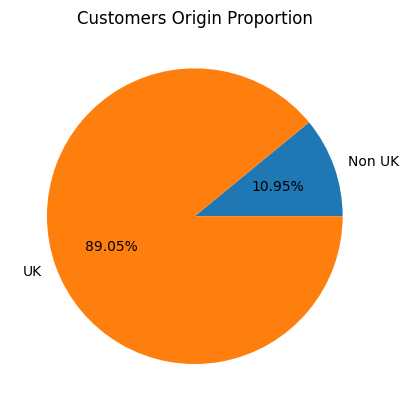

In [27]:
# Simplify country origin
df['Country_isUK'] = np.where(df['Country']=='United Kingdom', 'UK', 'Non UK')
customers_origin = df.groupby(['Country_isUK']).size()

plt.title('Customers Origin Proportion')
plt.pie(
    customers_origin,
    labels=customers_origin.index,
    autopct=lambda p: f'{p:.2f}%'
)
plt.show();

Based on the piechart, we could see that mostly our customers are from the UK.

Next, we could analyze the trend of purchasement. First, lets create `TotalAmount` column (`Quantity` * `UnitPrice`). Then, we could transform the `InvoiceDate` data type from string to date.

In [28]:
# Create new features and cast date column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Country_isUK  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom           UK   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom           UK   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   

   TotalAmount  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34

Then plot the trendline.

In [29]:
import matplotlib.dates as mdates

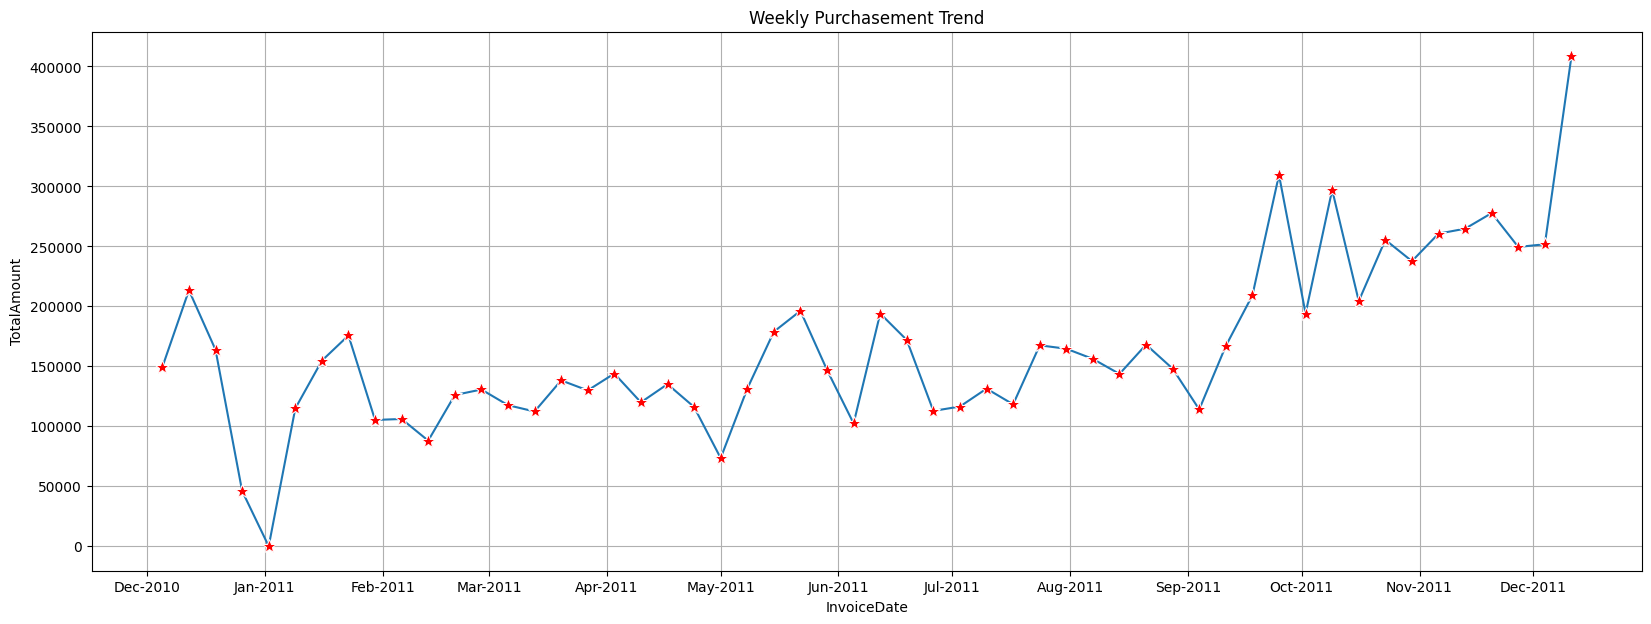

In [30]:
# Plot weekly trend
weekly_purchasements = df.copy()
weekly_purchasements = weekly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1W"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Weekly Purchasement Trend')
ax = sns.lineplot(
    x=weekly_purchasements.index,
    y=weekly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

In [31]:
weekly_purchasements

InvoiceDate
2010-12-05    149386.330
2010-12-12    213447.720
2010-12-19    163770.730
2010-12-26     46109.110
2011-01-02         0.000
2011-01-09    114865.270
2011-01-16    154714.940
2011-01-23    175757.980
2011-01-30    105288.770
2011-02-06    106095.230
2011-02-13     88015.420
2011-02-20    126050.400
2011-02-27    130687.360
2011-03-06    117600.820
2011-03-13    112338.000
2011-03-20    138278.820
2011-03-27    129918.430
2011-04-03    143977.030
2011-04-10    119961.920
2011-04-17    135142.201
2011-04-24    116090.020
2011-05-01     73474.560
2011-05-08    131329.180
2011-05-15    178850.250
2011-05-22    196269.920
2011-05-29    146976.900
2011-06-05    102371.900
2011-06-12    194019.080
2011-06-19    171940.300
2011-06-26    112818.820
2011-07-03    116479.920
2011-07-10    131383.740
2011-07-17    118297.880
2011-07-24    167519.810
2011-07-31    164667.901
2011-08-07    156185.190
2011-08-14    143652.210
2011-08-21    168080.690
2011-08-28    148051.260
2011-09-04   

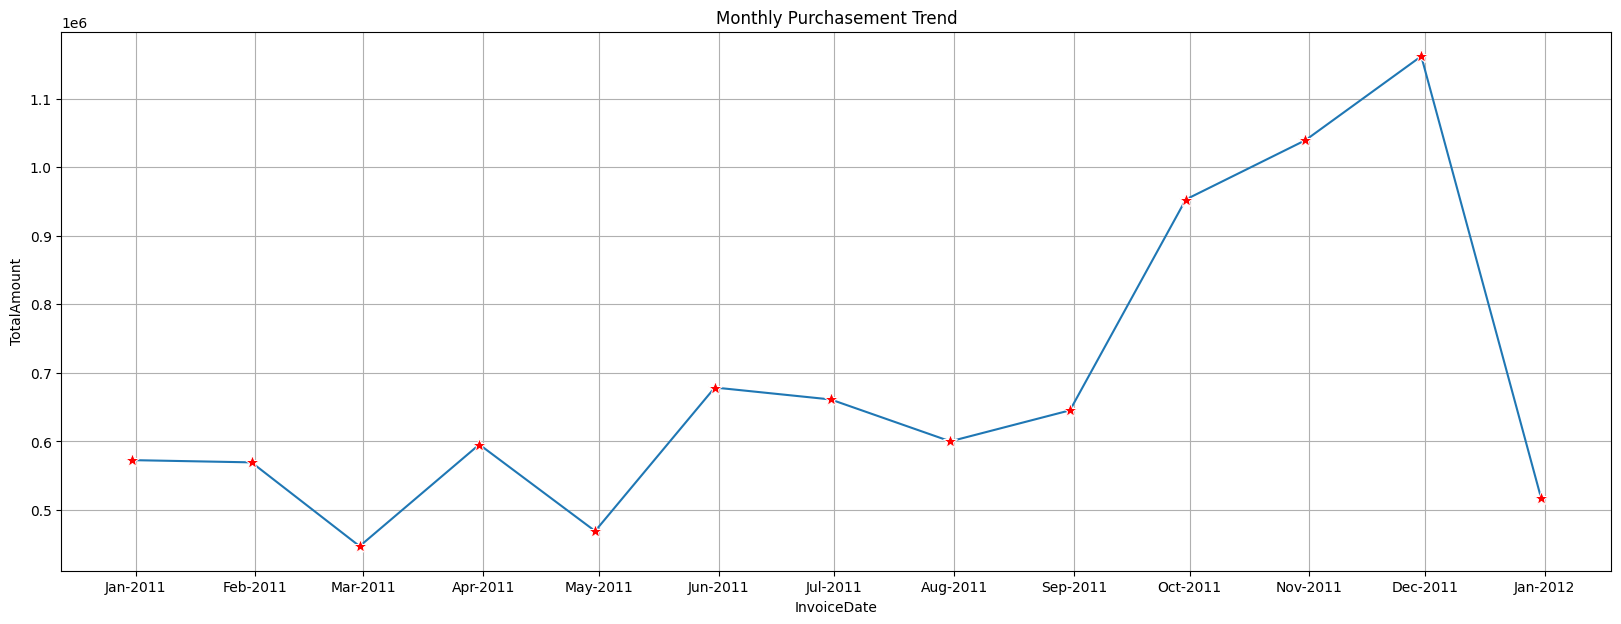

In [32]:
# Plot monthly trend
monthly_purchasements = df.copy()
monthly_purchasements = monthly_purchasements.groupby(
    by=pd.Grouper(key="InvoiceDate", freq="1M"))["TotalAmount"].sum()

plt.figure(figsize=(20, 7))
plt.title('Monthly Purchasement Trend')
ax = sns.lineplot(
    x=monthly_purchasements.index,
    y=monthly_purchasements,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.grid()
plt.show();

Based on the picture above, it can be seen that there was an increase in total purchases at the end of the year.

## RFM

In this project, we would segment the customers using customer's demography and purchasement behavior. To explain the customer's demography, we could use `Country` column while to explain the customer's purchasement behavior we have to transform our data first to get those information. We could use RFM analysis to get those information.

### Recency

To measure customer's recency, we could substract the latest transaction date in the data with each customer's latest transaction.

In [33]:
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency.head(10)

CustomerID
12346.0   2011-01-18 10:01:00
12347.0   2011-12-07 15:52:00
12348.0   2011-09-25 13:13:00
12349.0   2011-11-21 09:51:00
12350.0   2011-02-02 16:01:00
12352.0   2011-11-03 14:37:00
12353.0   2011-05-19 17:47:00
12354.0   2011-04-21 13:11:00
12355.0   2011-05-09 13:49:00
12356.0   2011-11-17 08:40:00
Name: InvoiceDate, dtype: datetime64[ns]

In [34]:
max(recency)

Timestamp('2011-12-09 12:50:00')

In [35]:
recency = max(recency) - recency
recency.head(10)

CustomerID
12346.0   325 days 02:49:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
12352.0    35 days 22:13:00
12353.0   203 days 19:03:00
12354.0   231 days 23:39:00
12355.0   213 days 23:01:00
12356.0    22 days 04:10:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [36]:
# Get customer's recency
recency = df.groupby(['CustomerID'])['InvoiceDate'].max()
recency = max(recency) - recency
recency = recency.dt.days
recency = recency.rename('Recency')

recency.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Recency, dtype: int64

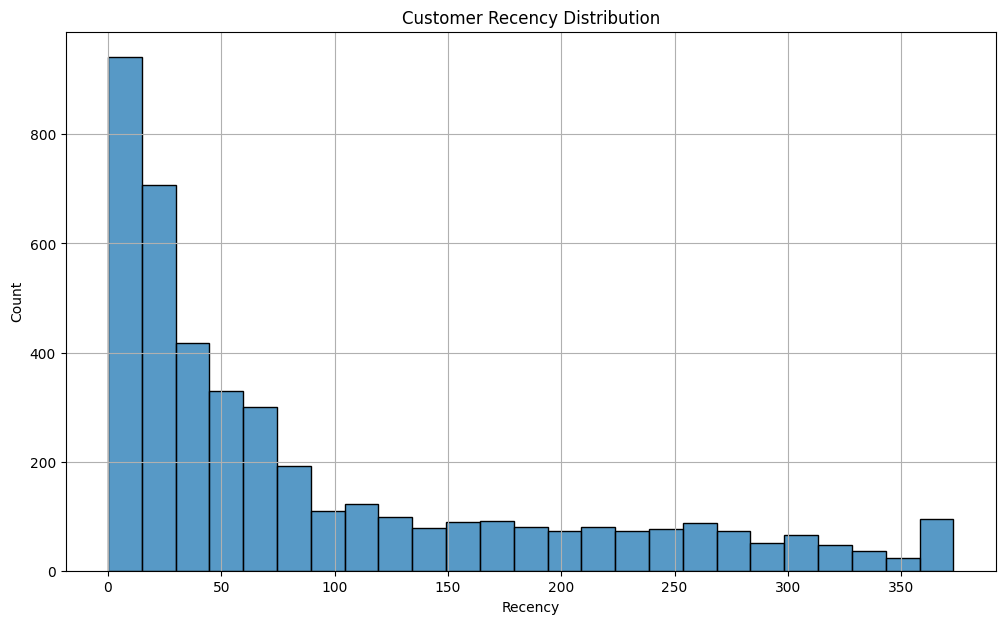

In [37]:
# Recency histogram plot
plt.figure(figsize=(12, 7))
sns.histplot(recency)
plt.title('Customer Recency Distribution')
plt.grid()
plt.show()

### Frequency

To measure customer's frequency, we could count customer's invoice.

In [38]:
# Count frequency
frequency = df.groupby(['CustomerID'])['InvoiceNo'].count()
frequency = frequency.rename('Frequency')
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

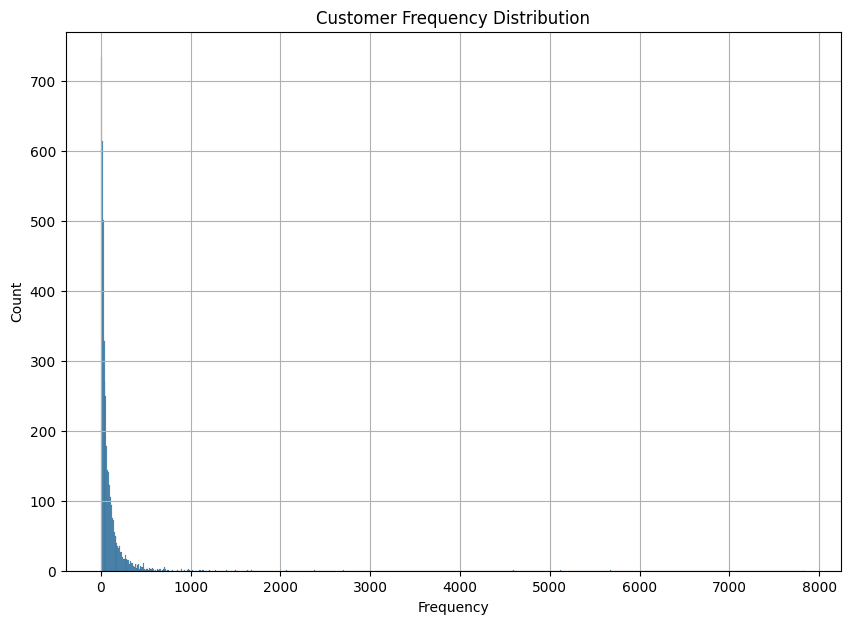

In [39]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency)
plt.grid()
plt.show();

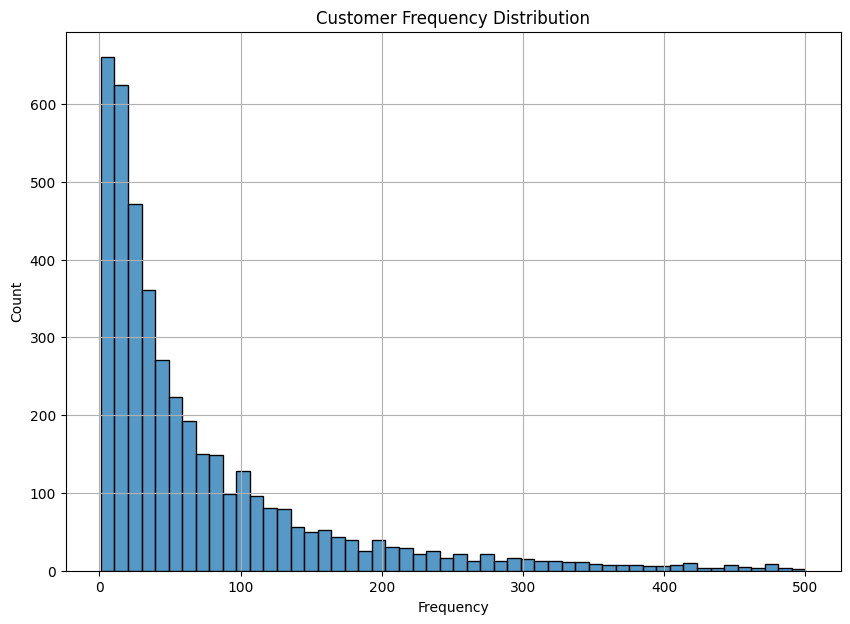

In [40]:
# Frequency histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Frequency Distribution')
sns.histplot(frequency[frequency <= 500])
plt.grid()
plt.show();

Text(0.5, 1.0, 'Frequency <= 500')

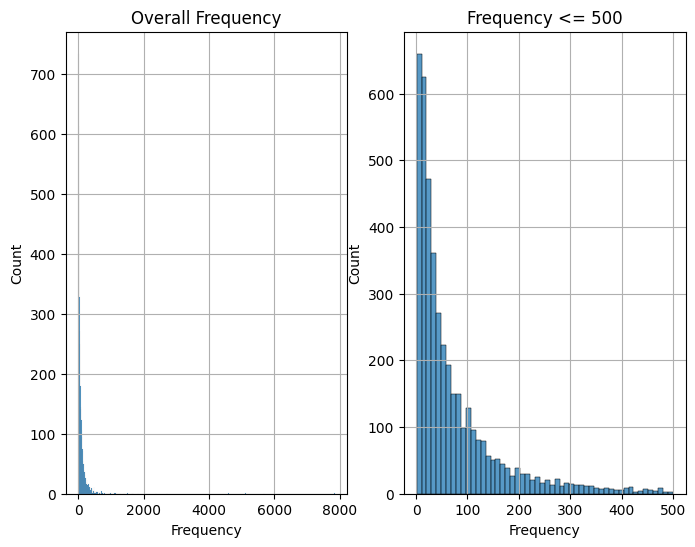

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(frequency, ax=axs[0])
sns.histplot(frequency[frequency <= 500], ax=axs[1])

axs[0].grid()
axs[0].set_title('Overall Frequency')

axs[1].grid()
axs[1].set_title('Frequency <= 500')

In [42]:
frequency.head()

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: Frequency, dtype: int64

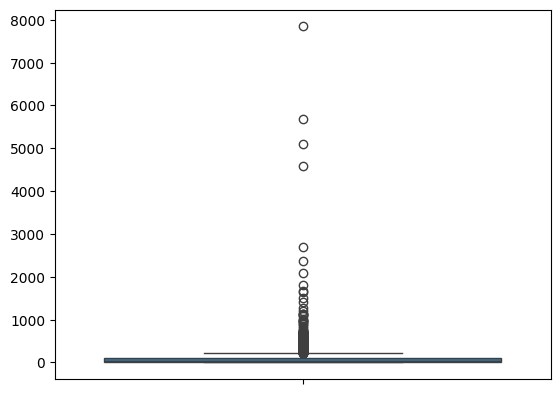

In [43]:
sns.boxplot(frequency.values);

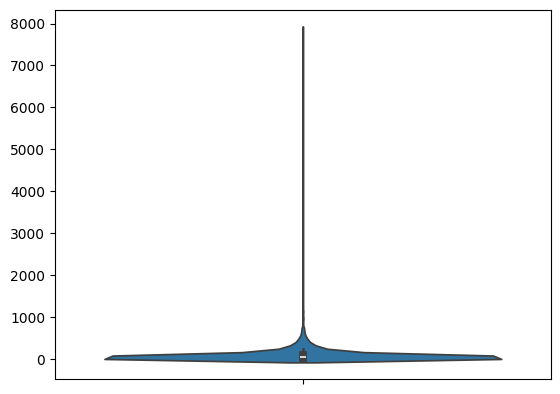

In [44]:
sns.violinplot(frequency.values);

### Monetary

To measure customer's monetary, we could sum the customer's total purchasements.

In [45]:
# Sum the money spent
monetary = df.groupby(['CustomerID'])['TotalAmount'].sum()
monetary = monetary.rename('Monetary')
monetary.head()

CustomerID
12346.0    77183.60
12347.0     4310.00
12348.0     1797.24
12349.0     1757.55
12350.0      334.40
Name: Monetary, dtype: float64

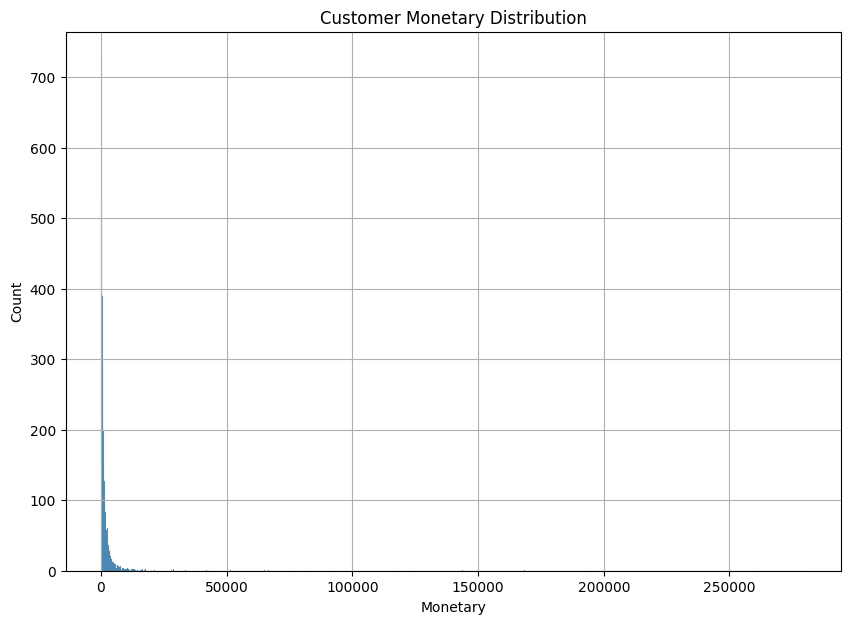

In [46]:
# Monetary histogram plot
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary)
plt.grid()
plt.show()

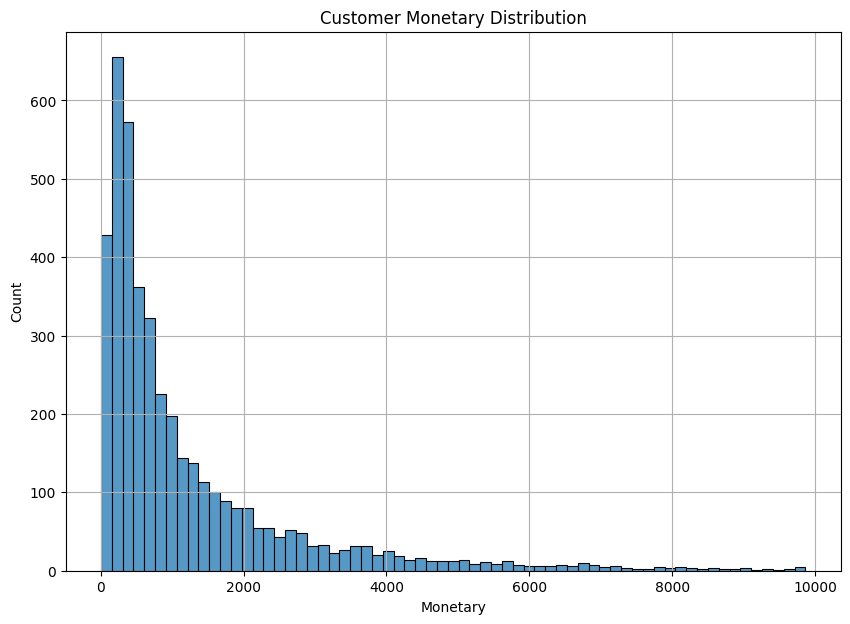

In [47]:
plt.figure(figsize=(10, 7))
plt.title('Customer Monetary Distribution')
sns.histplot(monetary[monetary < 10000])
plt.grid()
plt.show()

### Merge the Data

The data could be separated into two dataframes. The first dataframe (log transformed data) supposed to be used when modeling and the second one (without log transformation) could be used when visualize the result.

In [48]:
(
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

CustomerID Country_isUK
0        12346.0           UK
1        12347.0       Non UK
2        12348.0       Non UK
3        12349.0       Non UK
4        12350.0       Non UK
5        12352.0       Non UK
6        12353.0       Non UK
7        12354.0       Non UK
8        12355.0       Non UK
9        12356.0       Non UK
10       12357.0       Non UK
11       12358.0       Non UK
12       12359.0       Non UK
13       12360.0       Non UK
14       12361.0       Non UK
15       12362.0       Non UK
16       12363.0       Non UK
17       12364.0       Non UK
18       12365.0       Non UK
19       12367.0       Non UK
20       12370.0       Non UK
21       12371.0       Non UK
22       12372.0       Non UK
23       12373.0       Non UK
24       12374.0       Non UK
25       12375.0       Non UK
26       12377.0       Non UK
27       12378.0       Non UK
28       12379.0       Non UK
29       12380.0       Non UK
30       12381.0       Non UK
31       12383.0       Non UK
32       12384.0       Non UK
33       12386.0       Non UK
34       12388.0       Non UK
35       12390.0       Non UK
36       12391.0       Non UK
37       12393.0       Non UK
38       12394.0       Non UK
39       12395.0       Non UK
40       12397.0       Non UK
41       12398.0       Non UK
42       12399.0       Non UK
43       12401.0       Non UK
44       12402.0       Non UK
45       12403.0       Non UK
46       12405.0       Non UK
47       12406.0       Non UK
48       12407.0       Non UK
49       12408.0       Non UK
50       12409.0       Non UK
51       12410.0       Non UK
52       12412.0       Non UK
53       12413.0       Non UK
54       12414.0       Non UK
55       12415.0       Non UK
56       12417.0       Non UK
57       12418.0       Non UK
58       12420.0       Non UK
59       12421.0       Non UK
60       12422.0       Non UK
61       12423.0       Non UK
62       12424.0       Non UK
63       12425.0       Non UK
64       12426.0       Non UK
65       12427.0       Non UK
66       12428.0       Non UK
67       12429.0       Non UK
68       12430.0       Non UK
69       12431.0       Non UK
70       12432.0       Non UK
71       12433.0       Non UK
72       12434.0       Non UK
73       12435.0       Non UK
74       12436.0       Non UK
75       12437.0       Non UK
76       12438.0       Non UK
77       12441.0       Non UK
78       12442.0       Non UK
79       12444.0       Non UK
80       12445.0       Non UK
81       12446.0       Non UK
82       12447.0       Non UK
83       12448.0       Non UK
84       12449.0       Non UK
85       12450.0       Non UK
86       12451.0       Non UK
87       12452.0       Non UK
88       12453.0       Non UK
89       12454.0       Non UK
90       12455.0       Non UK
91       12456.0       Non UK
92       12457.0       Non UK
93       12458.0       Non UK
94       12461.0       Non UK
95       12462.0       Non UK
96       12463.0       Non UK
97       12464.0       Non UK
98       12465.0       Non UK
99       12468.0       Non UK
100      12471.0       Non UK
101      12472.0       Non UK
102      12473.0       Non UK
103      12474.0       Non UK
104      12475.0       Non UK
105      12476.0       Non UK
106      12477.0       Non UK
107      12478.0       Non UK
108      12479.0       Non UK
109      12480.0       Non UK
110      12481.0       Non UK
111      12483.0       Non UK
112      12484.0       Non UK
113      12488.0       Non UK
114      12489.0       Non UK
115      12490.0       Non UK
116      12491.0       Non UK
117      12492.0       Non UK
118      12493.0       Non UK
119      12494.0       Non UK
120      12497.0       Non UK
121      12498.0       Non UK
122      12500.0       Non UK
123      12501.0       Non UK
124      12502.0       Non UK
125      12504.0       Non UK
126      12506.0       Non UK
127      12507.0       Non UK
128      12508.0       Non UK
129      12509.0       Non UK
130      12510.0       Non UK
131      12512.0       Non UK
132      12513.0

In [49]:
df.groupby(['CustomerID', 'Country_isUK']).size()

CustomerID  Country_isUK
12346.0     UK                 1
12347.0     Non UK           182
12348.0     Non UK            31
12349.0     Non UK            73
12350.0     Non UK            17
12352.0     Non UK            85
12353.0     Non UK             4
12354.0     Non UK            58
12355.0     Non UK            13
12356.0     Non UK            59
12357.0     Non UK           131
12358.0     Non UK            19
12359.0     Non UK           248
12360.0     Non UK           129
12361.0     Non UK            10
12362.0     Non UK           266
12363.0     Non UK            23
12364.0     Non UK            85
12365.0     Non UK            22
12367.0     Non UK            11
12370.0     Non UK           167
12371.0     Non UK            63
12372.0     Non UK            52
12373.0     Non UK            14
12374.0     Non UK            33
12375.0     Non UK            17
12377.0     Non UK            77
12378.0     Non UK           219
12379.0     Non UK            40
12380.0     Non UK

In [50]:
# Get customer's country of origin
country = (
    df
    .groupby(['CustomerID', 'Country_isUK'])
    .size()
    .reset_index()
    .drop(0, axis=1)
)

# Merge the data
df_new = (
    country
    .merge(recency, on='CustomerID')
    .merge(frequency, on='CustomerID')
    .merge(monetary, on='CustomerID')
)

# Set CustomerID as index
df_new = df_new.set_index('CustomerID')
df_new.head(20)

Country_isUK  Recency  Frequency  Monetary
CustomerID                                           
12346.0              UK      325          1  77183.60
12347.0          Non UK        1        182   4310.00
12348.0          Non UK       74         31   1797.24
12349.0          Non UK       18         73   1757.55
12350.0          Non UK      309         17    334.40
12352.0          Non UK       35         85   2506.04
12353.0          Non UK      203          4     89.00
12354.0          Non UK      231         58   1079.40
12355.0          Non UK      213         13    459.40
12356.0          Non UK       22         59   2811.43
12357.0          Non UK       32        131   6207.67
12358.0          Non UK        1         19   1168.06
12359.0          Non UK       57        248   6372.58
12360.0          Non UK       51        129   2662.06
12361.0          Non UK      286         10    189.90
12362.0          Non UK        2        266   5226.23
12363.0          Non UK      109         23    552.00
12364.0          Non UK        7         85   1313.10
12365.0          Non UK      290         22    641.38
12367.0          Non UK        3         11    168.90

### One Hot Encoding

Since our model could just accept the numeric value, we have to recode the non numeric column.

In [51]:
# Recode the non numeric variable

df_new = pd.get_dummies(
    df_new,
    columns=['Country_isUK'],
    drop_first=True
)

df_new = df_new.rename(
    columns={'Country_isUK_UK': 'Country_UK'}
)

df_new.head()

Recency  Frequency  Monetary  Country_UK
CustomerID                                          
12346.0         325          1  77183.60        True
12347.0           1        182   4310.00       False
12348.0          74         31   1797.24       False
12349.0          18         73   1757.55       False
12350.0         309         17    334.40       False

### Scaling

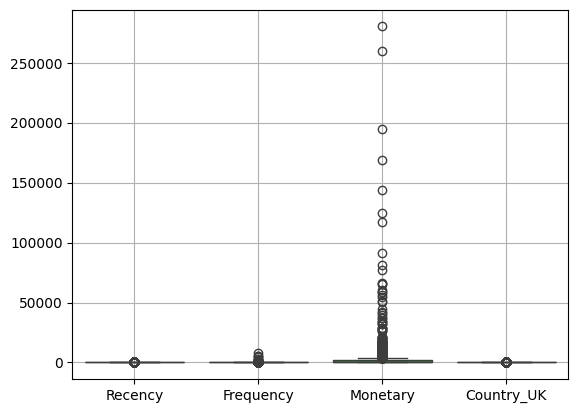

In [52]:
sns.boxplot(data=df_new)
plt.grid()
plt.show()

As we could see, there are variation of range in each column. We have to standardize it first.

In [53]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

df_scaled = pd.DataFrame(
    df_scaled,
    columns=df_new.columns,
    index=df_new.index
)

df_scaled.head()

Recency  Frequency  Monetary  Country_UK
CustomerID                                           
12346.0     2.334574  -0.396578  8.358668    0.326547
12347.0    -0.905340   0.394649  0.250966   -3.062350
12348.0    -0.175360  -0.265435 -0.028596   -3.062350
12349.0    -0.735345  -0.081836 -0.033012   -3.062350
12350.0     2.174578  -0.326635 -0.191347   -3.062350

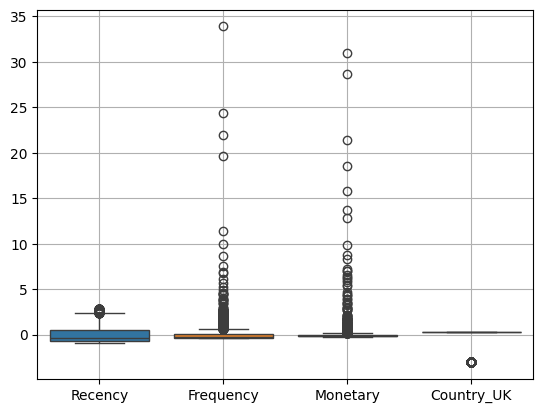

In [54]:
# Plot scaled data
sns.boxplot(data=df_scaled)
plt.grid()
plt.show()

## Modeling

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [56]:
# Modeling
possible_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    silhouette.append(silhouette_score(X=df_scaled, labels=kmeans.labels_))

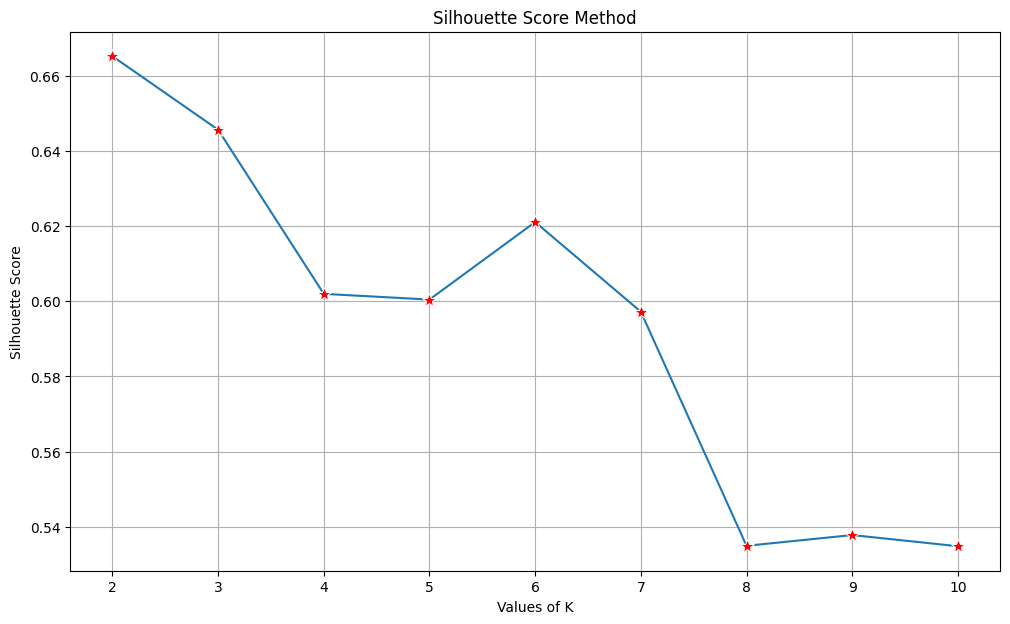

In [57]:
# Plot the score
plt.figure(figsize=(12, 7))
sns.lineplot(
    x=possible_k,
    y=silhouette,
    marker='*',
    markersize=10,
    markerfacecolor='red'
)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show();

Using silhouette score, the best K is either 2 or 6

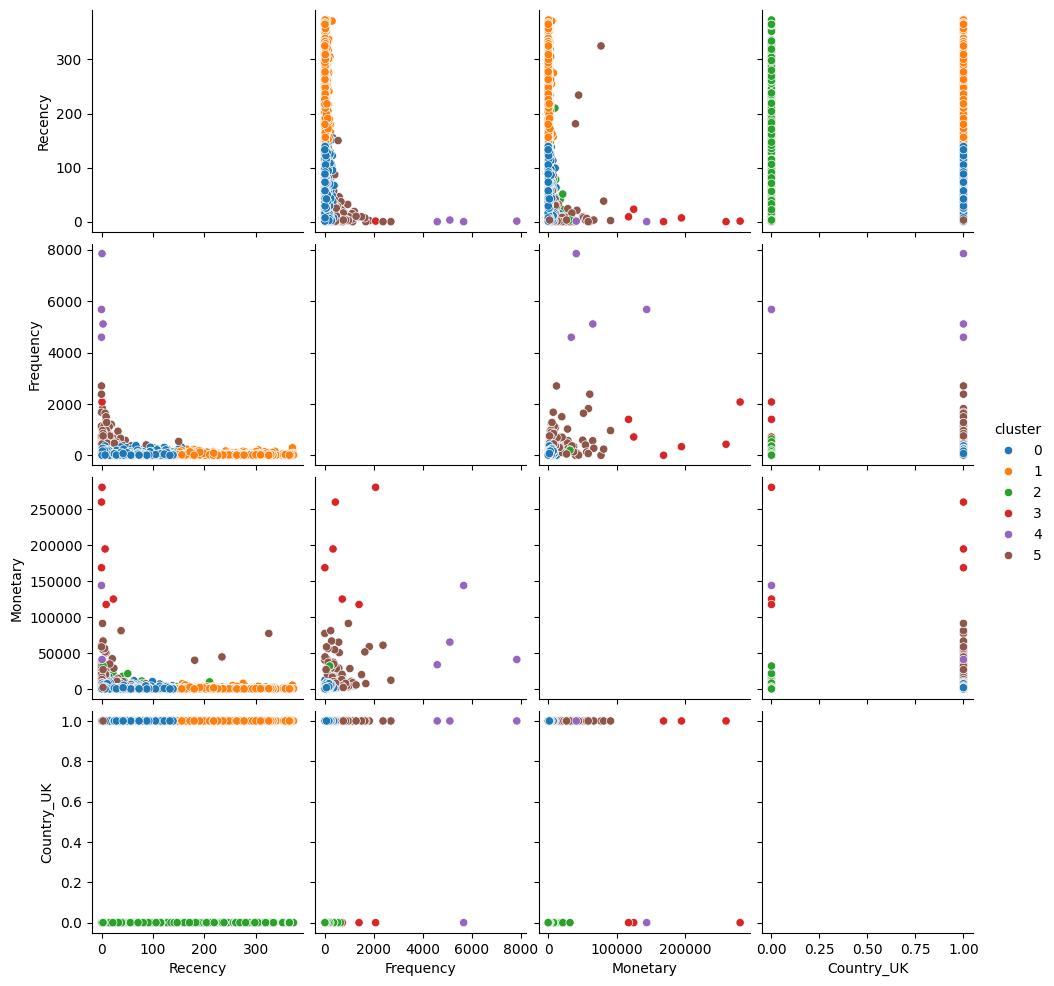

In [58]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(df_scaled)

df_result_kmeans = df_new.copy()
df_result_kmeans['cluster'] = kmeans.labels_

sns.pairplot(
    data=df_result_kmeans,
    hue='cluster',
    diag_kind='None',
    palette='tab10'
)

plt.show();

In [59]:
# Quantile function
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# Simple descriptive statistic
(
    df_result_kmeans
    .drop("Country_UK", axis = 1)
    .groupby('cluster')
    .aggregate(['mean', 'std', 'min', q25, 'median', q75, 'max'])
    .transpose()
)

cluster                      0            1             2              3  \
Recency   mean       42.676884   246.776618     95.405797       6.666667   
          std        36.313016    65.636727    104.638705       8.869423   
          min         0.000000   143.000000      0.000000       0.000000   
          q25        14.000000   189.000000     18.000000       0.250000   
          median     31.000000   242.000000     52.000000       4.000000   
          q75        64.000000   296.000000    136.500000       8.500000   
          max       155.000000   373.000000    373.000000      23.000000   
Frequency mean       76.270826    27.689979     81.396135     826.833333   
          std        74.030983    32.176026     96.304061     771.620481   
          min         1.000000     1.000000      1.000000       3.000000   
          q25        22.000000     8.250000     21.250000     360.500000   
          median     51.000000    18.000000     45.000000     572.500000   
          q75       107.000000    33.000000    101.000000    1228.500000   
          max       385.000000   297.000000    638.000000    2076.000000   
Monetary  mean     1341.293935   450.793070   2262.538913  190863.461667   
          std      1592.871914   610.367153   3479.689136   67791.993010   
          min         6.200000     3.750000     51.560000  117379.630000   
          q25       371.700000   163.225000    459.650000  135804.022500   
          median    795.120000   305.515000   1025.700000  181511.645000   
          q75      1720.300000   505.542500   2659.962500  243380.672500   
          max     17654.540000  7832.470000  31906.820000  280206.020000   

cluster                       4             5  
Recency   mean         1.000000     15.234973  
          std          1.414214     35.305176  
          min          0.000000      0.000000  
          q25          0.000000      2.000000  
          median       0.500000      6.000000  
          q75          1.500000     16.000000  
          max          3.000000    325.000000  
Frequency mean      5807.000000    535.360656  
          std       1429.730044    358.078267  
          min       4595.000000      1.000000  
          q25       4982.000000    367.000000  
          median    5393.000000    450.000000  
          q75       6218.000000    589.500000  
          max       7847.000000   2700.000000  
Monetary  mean     70925.287500  13085.065738  
          std      50424.336433  16313.461152  
          min      33719.730000   1093.650000  
          q25      39173.610000   4014.945000  
          median   53078.180000   6923.130000  
          q75      84829.857500  13213.210000  
          max     143825.060000  91062.380000

In [60]:
df_result_kmeans.head(20)

Recency  Frequency  Monetary  Country_UK  cluster
CustomerID                                                   
12346.0         325          1  77183.60        True        5
12347.0           1        182   4310.00       False        2
12348.0          74         31   1797.24       False        2
12349.0          18         73   1757.55       False        2
12350.0         309         17    334.40       False        2
12352.0          35         85   2506.04       False        2
12353.0         203          4     89.00       False        2
12354.0         231         58   1079.40       False        2
12355.0         213         13    459.40       False        2
12356.0          22         59   2811.43       False        2
12357.0          32        131   6207.67       False        2
12358.0           1         19   1168.06       False        2
12359.0          57        248   6372.58       False        2
12360.0          51        129   2662.06       False        2
12361.0         286         10    189.90       False        2
12362.0           2        266   5226.23       False        2
12363.0         109         23    552.00       False        2
12364.0           7         85   1313.10       False        2
12365.0         290         22    641.38       False        2
12367.0           3         11    168.90       False        2

In [61]:
df.CustomerID.nunique()

4338

In [62]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Recency"].count()

cluster  Country_UK
0        True          2773
1        True           958
2        False          414
3        False            3
         True             3
4        False            1
         True             3
5        True           183
Name: Recency, dtype: int64

In [63]:
df_result_kmeans.groupby(["cluster", "Country_UK"])["Frequency"].count()

cluster  Country_UK
0        True          2773
1        True           958
2        False          414
3        False            3
         True             3
4        False            1
         True             3
5        True           183
Name: Frequency, dtype: int64

That's it! The customer's behavior really segmented by their country of origin.

What if we separate the customer by its country of origin before doing cluster analysis?

In [64]:
df_result_kmeans.Recency.quantile([0.25, 0.5, 0.75])

0.25     17.0
0.50     50.0
0.75    141.0
Name: Recency, dtype: float64

In [65]:
def rqs(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

df_result_kmeans["Recency_Quality"] = df_result_kmeans['Recency'].apply(rqs)
df_result_kmeans.head(20)

Recency  Frequency  Monetary  Country_UK  cluster Recency_Quality
CustomerID                                                                   
12346.0         325          1  77183.60        True        5           Bad_R
12347.0           1        182   4310.00       False        2          High_R
12348.0          74         31   1797.24       False        2           Low_R
12349.0          18         73   1757.55       False        2        Medium_R
12350.0         309         17    334.40       False        2           Bad_R
12352.0          35         85   2506.04       False        2        Medium_R
12353.0         203          4     89.00       False        2           Bad_R
12354.0         231         58   1079.40       False        2           Bad_R
12355.0         213         13    459.40       False        2           Bad_R
12356.0          22         59   2811.43       False        2        Medium_R
12357.0          32        131   6207.67       False        2        Medium_R
12358.0           1         19   1168.06       False        2          High_R
12359.0          57        248   6372.58       False        2           Low_R
12360.0          51        129   2662.06       False        2           Low_R
12361.0         286         10    189.90       False        2           Bad_R
12362.0           2        266   5226.23       False        2          High_R
12363.0         109         23    552.00       False        2           Low_R
12364.0           7         85   1313.10       False        2          High_R
12365.0         290         22    641.38       False        2           Bad_R
12367.0           3         11    168.90       False        2          High_R

In [66]:
df_result_kmeans["Recency_Quality"].value_counts()

Recency_Quality
Low_R       1092
Medium_R    1092
Bad_R       1088
High_R      1066
Name: count, dtype: int64

In [67]:
# recency_quatile_scoring: rqs
def rqs_if_else(recency_score):
  if recency_score < 17:
    return "High_R"
  elif 17 <= recency_score < 50:
    return "Medium_R"
  elif 50 <= recency_score < 141:
    return "Low_R"
  else:
    return "Bad_R"

In [68]:
%timeit df_result_kmeans['Recency'].apply(rqs_if_else)

1.59 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [69]:
import numpy as np

def rqs_np(recency_score):
    thresholds = [17, 50, 141]
    labels = ["High_R", "Medium_R", "Low_R", "Bad_R"]
    return labels[np.digitize(recency_score, thresholds, right=True)]

In [70]:
%timeit df_result_kmeans['Recency'].apply(rqs_np)

25.9 ms ± 2.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
data_recency = df_result_kmeans['Recency'].values

In [72]:
%%timeit
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

29 ms ± 3.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
pd.Series(np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))).value_counts()

Low_R    1092
Mediu    1092
Bad_R    1088
High_    1066
Name: count, dtype: int64

In [74]:
np.apply_along_axis(rqs, axis=0, arr=data_recency.reshape(1,-1))

array(['Bad_R', 'High_', 'Low_R', ..., 'High_', 'High_', 'Mediu'],
      dtype='<U5')

# Question

1. (30 point) Lakukan EDA lebih mendalam dari data yang tersedia. Misalnya: a) Siapa top 5 customer dengan pembelian terbanyak? b) Kapan waktu pembelian dengan jumlah customer terbanyak? (Misal hari apa, jam berapa, bulan apa, minggu ke berapa, dst). EDA juga bisa dilakukan menggunakan business question lain.
2. (30 point) Apa karakteristik/ciri utama dari masing-masing cluster? Apa promo yang kira-kira cocok untuk diberikan ke masing-masing cluster?
3. (40 point) Bagaimana jika segmentation difokuskan untuk customer di luar UK? Apakah terdapat insight yang menarik? Apa karakteristik utama dari cluster-cluster non UK?

##1.EDA

In [75]:
import pandas as pd

# copy DataFrame
df_eda = df.copy()

# Convert 'InvoiceDate' column to datetime format
df_eda['InvoiceDate'] = pd.to_datetime(df_eda['InvoiceDate'])

# Extract year, month, week, day, and hour
df_eda['year'] = df_eda['InvoiceDate'].dt.year
df_eda['month'] = df_eda['InvoiceDate'].dt.month
df_eda['week'] = df_eda['InvoiceDate'].dt.isocalendar().week
df_eda['date'] = df_eda['InvoiceDate'].dt.day
df_eda['day'] = df_eda['InvoiceDate'].dt.day_name()
df_eda['hour'] = df_eda['InvoiceDate'].dt.hour

In [76]:
df_eda['Country'] = df_eda['Country'].apply(lambda x:'United Kingdom' if x=='United Kingdom' else 'Others')

In [77]:
df_eda.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Country_isUK  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom           UK   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom           UK   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   

   TotalAmount  year  month  week  date        day  hour  
0        15.30  2010     12    48     1  Wednesday     8  
1        20.34  2010     12    48     1  Wednesday     8  
2        22.00  2010     12    48     1  Wednesday     8  
3        20.34  2010     12    48     1  Wednesday     8  
4        20.34  2010     12    48     1  Wednesday     8

Top 5 Customers by Purchase Frequency:
      CustomerID  Frequency
4010     17841.0       7847
1879     14911.0       5675
1289     14096.0       5111
326      12748.0       4595
1661     14606.0       2700


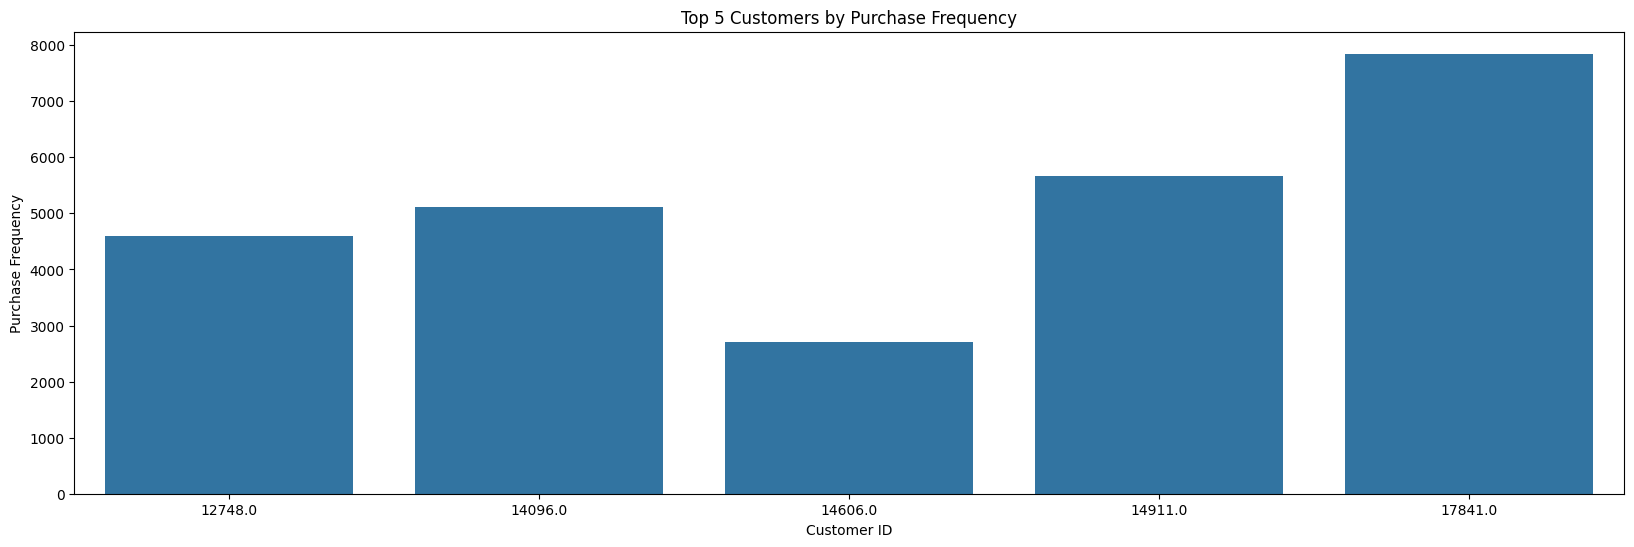

In [78]:
# Menghitung jumlah InvoiceNo untuk setiap CustomerID
grouped_data = df_eda.groupby('CustomerID')['InvoiceNo'].count().reset_index()
grouped_data.columns = ['CustomerID', 'Frequency']

# Menampilkan top 5 pelanggan dengan pembelian terbanyak
top_5_customers = grouped_data.nlargest(5, 'Frequency')

# Menampilkan tabel top 5 pelanggan
print("Top 5 Customers by Purchase Frequency:")
print(top_5_customers)

# Plot bar chart untuk top 5 pelanggan
plt.figure(figsize=(20, 6))
sns.barplot(x='CustomerID', y='Frequency', data=top_5_customers)
plt.title('Top 5 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Purchase Frequency')
plt.show()

Berikut adalah top 5 pelanggan dengan pembelian terbanyak:
* Pelanggan dengan ID 17841 melakukan pembelian paling sering, yaitu sebanyak 7847 kali.
* Pelanggan dengan ID 14911 dan 14096 memiliki frekuensi pembelian yang hampir sama, yaitu sekitar 5675 dan 5111 kali.
* Pelanggan dengan ID 12748 dan 14606 memiliki frekuensi pembelian yang relatif lebih sedikit dibandingkan dengan 3 pelanggan di atas, yaitu sekitar 4595 dan 2700 kali.

Data ini menunjukkan bahwa 5 pelanggan ini merupakan pelanggan yang sangat aktif dan potensial untuk meningkatkan penjualan.

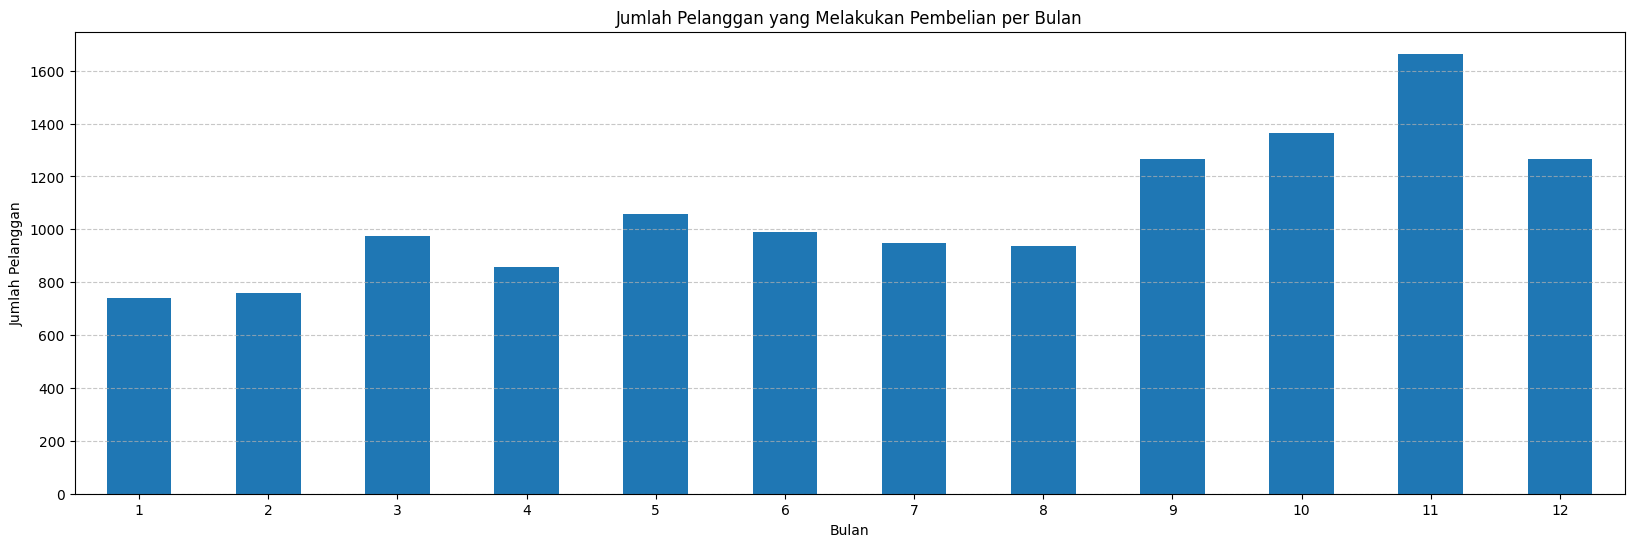

In [79]:
# Menghitung jumlah pelanggan pada setiap waktu pembelian
customer_count_by_month = df_eda.groupby(df_eda['month'])['CustomerID'].nunique()

# Visualisasi data
plt.figure(figsize=(20, 6))
customer_count_by_month.plot(kind='bar')
plt.title('Jumlah Pelanggan yang Melakukan Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)  # Untuk menampilkan label jam tanpa rotasi
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan visualisasi data diatas, terlihat adanya tren peningkatan jumlah customer yang melakukan pembelian di akhir tahun dibandingkan dengan awal tahun. Tren kenaikan ini mencapai puncaknya di akhir bulan November, dengan jumlah customer yang melakukan pembelian terbanyak pada bulan tersebut sekitar 1600 lebih orang. Hal ini kemungkinan disebabkan oleh beberapa faktor, seperti:
  * Promo dan Diskon: Toko mengadakan promo dan diskon besar-besaran di akhir bulan untuk menarik pembeli.
  * Gaji Bulanan: Banyak orang menerima gaji bulanan mereka di akhir bulan dan menggunakannya untuk berbelanja.
  * Persiapan Liburan: Akhir bulan November mendekati musim liburan akhir tahun, sehingga banyak orang yang berbelanja untuk persiapan liburan.

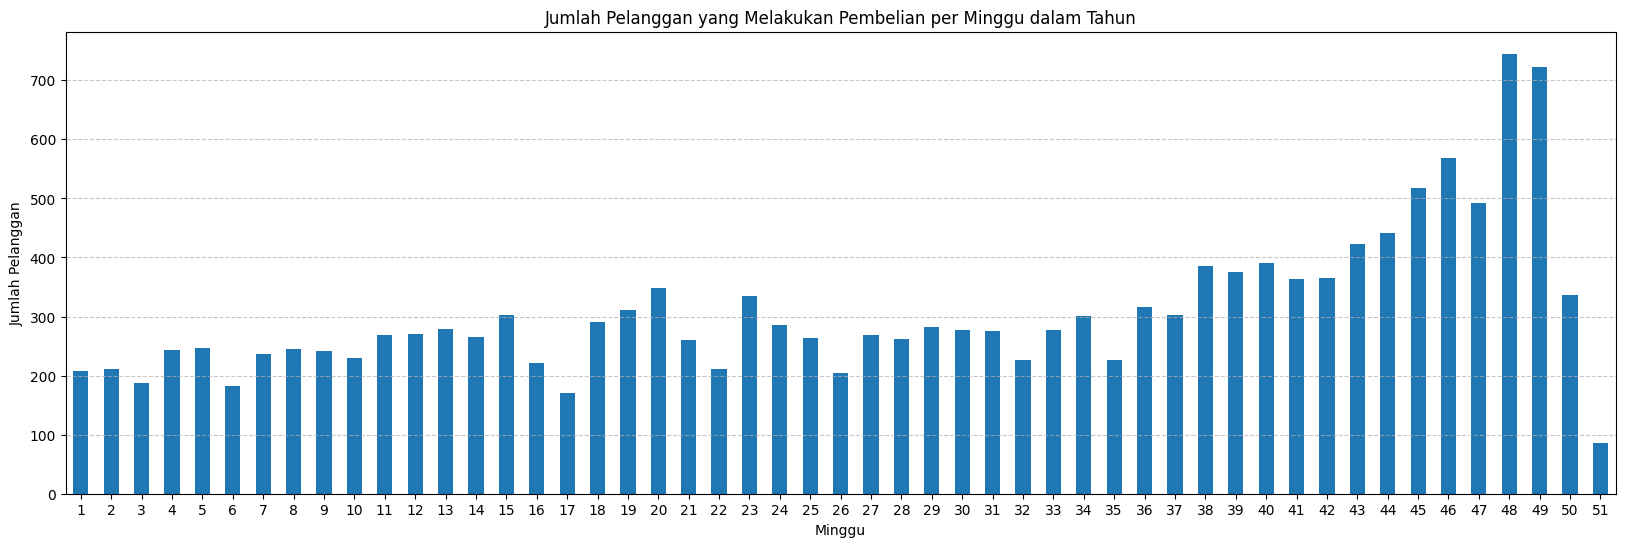

In [80]:
# Menghitung jumlah pelanggan yang berbeda pada setiap minggu
customer_count_by_week = df_eda.groupby(df_eda['week'])['CustomerID'].nunique()

# Visualisasi data
plt.figure(figsize=(20, 6))
customer_count_by_week.plot(kind='bar')
plt.title('Jumlah Pelanggan yang Melakukan Pembelian per Minggu dalam Tahun')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)  # Untuk memutar label minggu agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan visualisasi data diatas, terlihat adanya tren kenaikan jumlah customer yang melakukan pembelian pada minggu-minggu terakhir. Minggu ke-48 tercatat sebagai minggu dengan jumlah customer terbanyak. Hal ini kemungkinan disebabkan oleh beberapa faktor, seperti:
* Liburan Natal dan Tahun Baru: Periode Natal dan Tahun Baru yang jatuh pada akhir bulan Desember dan awal bulan Januari dapat menjadi salah satu faktor yang mendorong kenaikan pembelian di minggu-minggu terakhir.
* Perasaan Ingin Berbelanja: Menjelang akhir tahun, banyak orang memiliki perasaan ingin berbelanja untuk merayakan Natal, Tahun Baru, dan menyambut tahun baru.

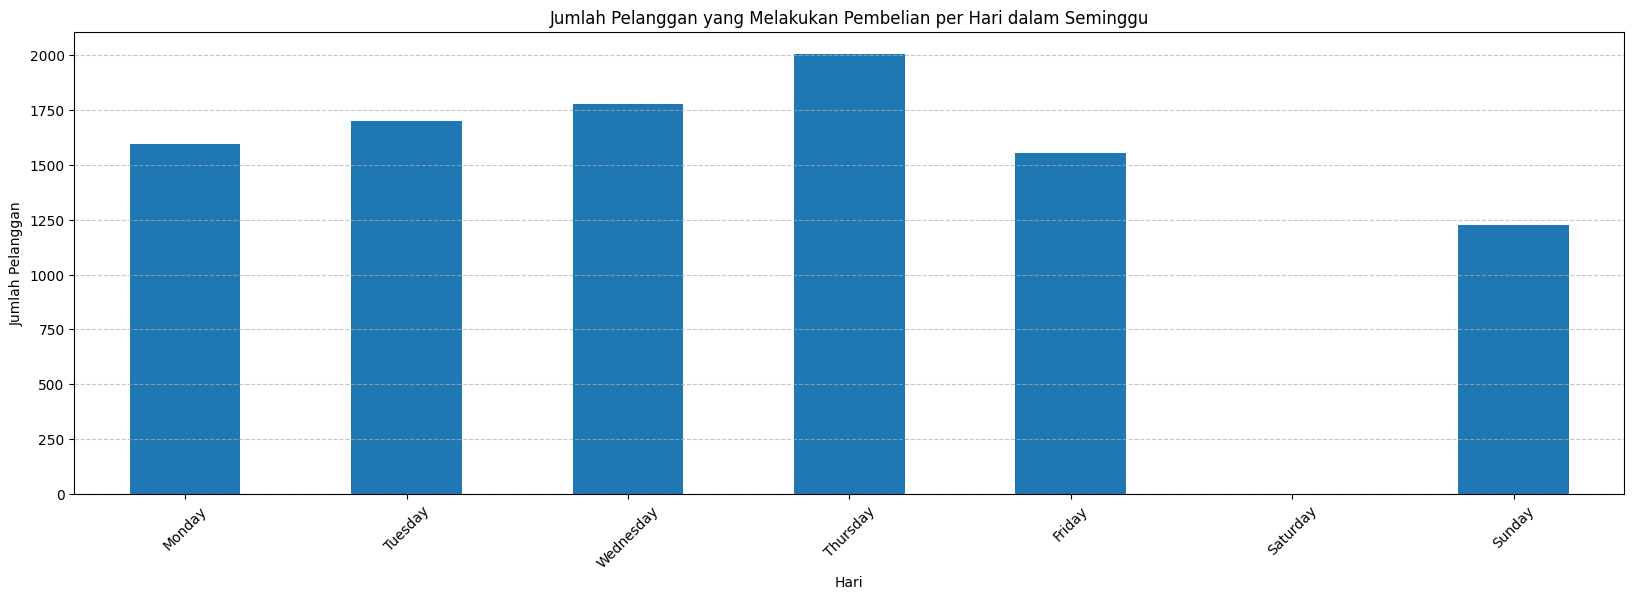

In [81]:
# Menghitung jumlah pelanggan pada setiap hari pembelian
customer_count_by_day = df_eda.groupby(df_eda['day'])['CustomerID'].nunique()

# Mengurutkan hari-hari dalam seminggu secara urut
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
customer_count_by_day = customer_count_by_day.reindex(days_order)

# Visualisasi data
plt.figure(figsize=(20, 6))
customer_count_by_day.plot(kind='bar')
plt.title('Jumlah Pelanggan yang Melakukan Pembelian per Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)  # Untuk memutar label hari agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan informasi yang diberikan, terlihat adanya tren kenaikan jumlah customer yang melakukan pembelian dari hari Senin sampai Kamis. Hari Kamis tercatat sebagai hari dengan jumlah customer terbanyak. Hal ini mungkin disebabkan oleh kebiasaan customer untuk menunda pembelian hingga pertengahan minggu. Customer mungkin sibuk dengan pekerjaan atau aktivitas lainnya di awal minggu dan memiliki lebih banyak waktu untuk berbelanja pada hari Kamis.

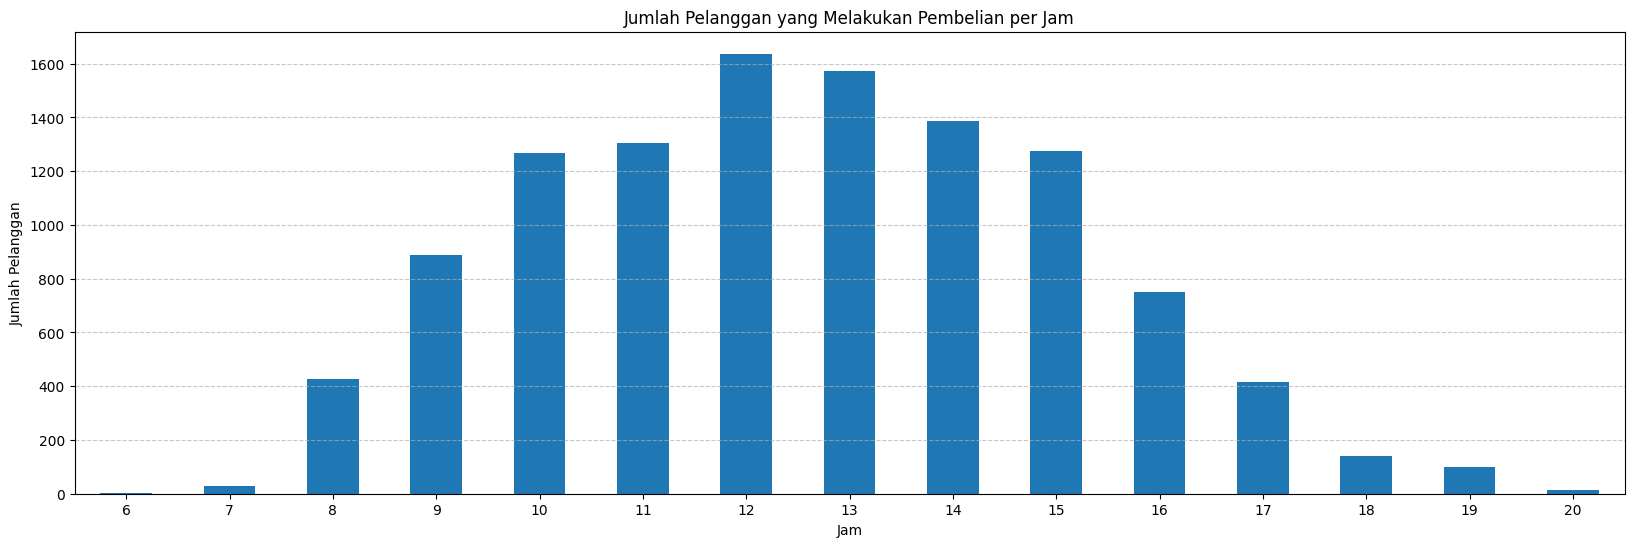

In [82]:
# Menghitung jumlah pelanggan pada setiap waktu pembelian
customer_count_by_time = df_eda.groupby(df_eda['hour'])['CustomerID'].nunique()

# Visualisasi data
plt.figure(figsize=(20, 6))
customer_count_by_time.plot(kind='bar')
plt.title('Jumlah Pelanggan yang Melakukan Pembelian per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)  # Untuk menampilkan label jam tanpa rotasi
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Berdasarkan informasi yang diberikan, terlihat adanya tren kenaikan jumlah customer yang melakukan pembelian mulai dari jam 6 pagi hingga puncak tertinggi pada jam 12 siang. Hal ini kemungkinan disebabkan oleh beberapa faktor, seperti:
* Tren kenaikan pembelian pada pagi hari hingga jam 12 siang mungkin terkait dengan jam kerja customer.
* Customer mungkin melakukan pembelian melalui perangkat mobile mereka selama perjalanan ke kantor atau saat istirahat makan siang.

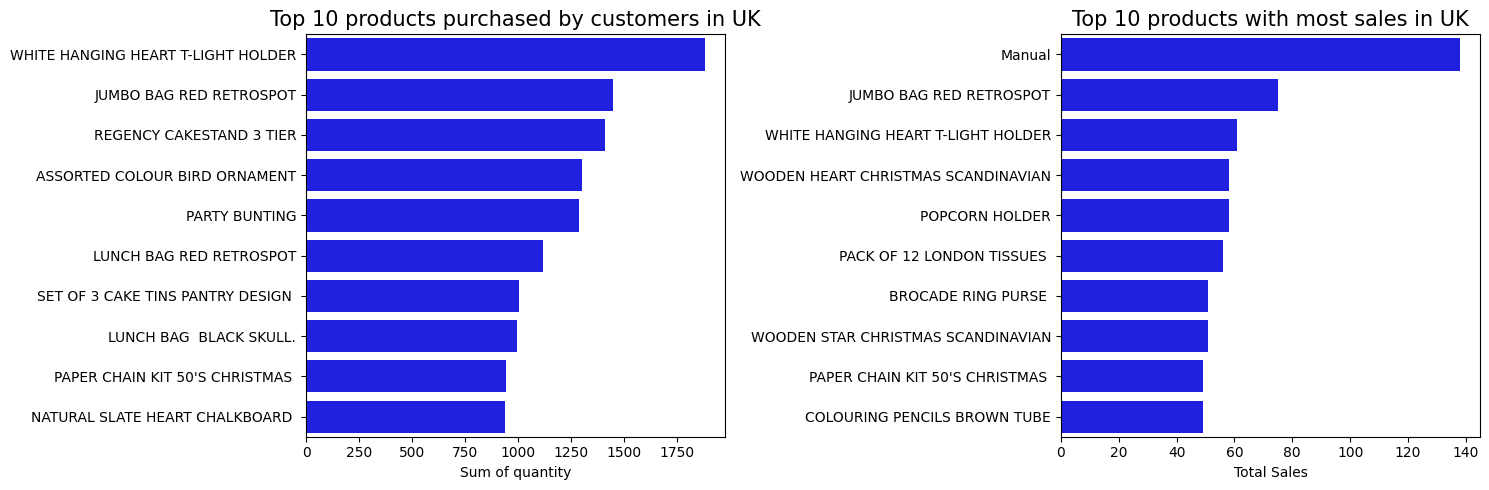

In [83]:
column = ['InvoiceNo','TotalAmount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df_eda[df_eda['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_eda[df_eda['Country']=='United Kingdom'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='blue')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)

plt.tight_layout()
plt.show()

Berikut analisis dari visualisasi data untuk customer yang berada di UK:
1. Grafik pembelian produk terbanyak
  * Produk dengan jumlah kuantitas pembelian terbanyak adalah `WHITE HANGING HEART T-LIGHT HOLDER`.
  * Grafik ini memberikan wawasan tentang preferensi pelanggan dalam hal jumlah produk yang dibeli.
2. Grafik penjualan tertinggi
  * Produk dengan total penjualan tertinggi adalah `Manual`.
  * Grafik ini menggambarkan produk-produk yang paling menguntungkan dari segi total penjualan.

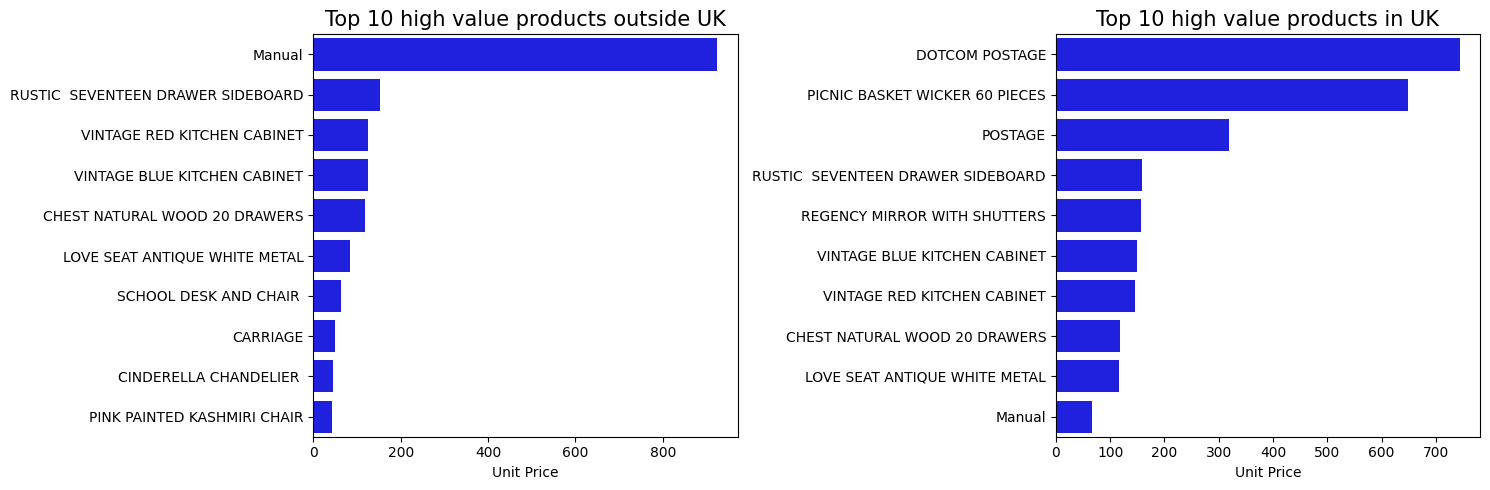

In [84]:
column = ['Others','United Kingdom']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df_eda[df_eda['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).values,
                y = df_eda[df_eda['Country']==j].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False).head(10).index,
                color='blue')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products outside UK',size=15)
    else:
        plt.xlabel('Unit Price')
        plt.title('Top 10 high value products in UK',size=15)

plt.tight_layout()
plt.show()

Berikut analisis dari visualisasi data diatas untuk produk yang dijual di dalam dan di luar UK:
1. Grafik harga produk di luar UK
  * Produk dengan harga tertinggi yang dijual adalah `Manual`.
  * Grafik ini menggambarkan produk-produk yang paling mahal dari segi penjualan
2. Grafik harga produk di UK
  * Produk dengan harga tertinggi yang dijual adalah `DOTCOM POSTAGE`.
  * Grafik ini menggambarkan produk-produk yang paling mahal dari segi penjualan.

##2.Cluster Analysis

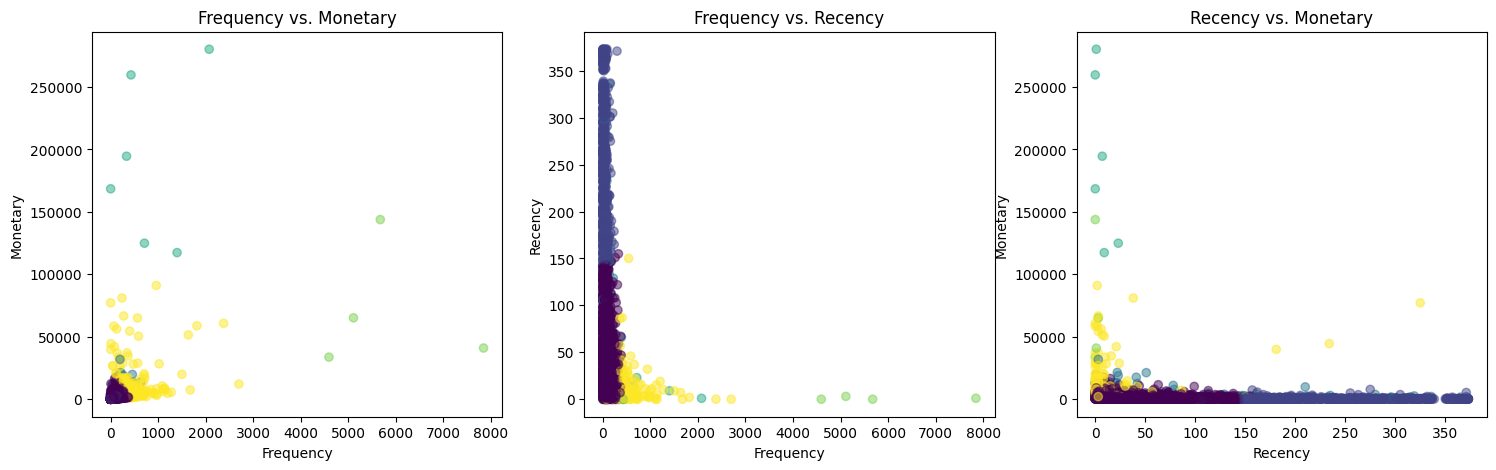

In [85]:
columns = ['Frequency', 'Monetary', 'Recency']
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

for i, ax in enumerate(axes.flatten()):
    if i < 2:
        j = 0
        k = i + 1
    else:
        j = i
        k = i - 1

    ax.scatter(df_result_kmeans[columns[j]], df_result_kmeans[columns[k]], c=df_result_kmeans['cluster'], cmap='viridis', alpha=0.5)
    ax.set_xlabel(columns[j])
    ax.set_ylabel(columns[k])
    ax.set_title(columns[j] + ' vs. ' + columns[k])

plt.show()

In [86]:
# Hitung statistik deskriptif untuk setiap cluster
cluster_stats = df_result_kmeans.groupby('cluster').agg({
    'Frequency': ['count', 'mean', 'median', 'sum'],
    'Monetary': ['count', 'mean', 'median', 'sum'],
    'Recency': ['count', 'mean', 'median', 'sum']
}).reset_index()

# Transpose DataFrame dan tampilkan dengan dua desimal
cluster_stats_transposed = cluster_stats.T.round(2)
cluster_stats_transposed

0          1          2           3          4  \
cluster                 0.00       1.00       2.00        3.00       4.00   
Frequency count      2773.00     958.00     414.00        6.00       4.00   
          mean         76.27      27.69      81.40      826.83    5807.00   
          median       51.00      18.00      45.00      572.50    5393.00   
          sum      211499.00   26527.00   33698.00     4961.00   23228.00   
Monetary  count      2773.00     958.00     414.00        6.00       4.00   
          mean       1341.29     450.79    2262.54   190863.46   70925.29   
          median      795.12     305.52    1025.70   181511.64   53078.18   
          sum     3719408.08  431859.76  936691.11  1145180.77  283701.15   
Recency   count      2773.00     958.00     414.00        6.00       4.00   
          mean         42.68     246.78      95.41        6.67       1.00   
          median       31.00     242.00      52.00        4.00       0.50   
          sum      118343.00  236412.00   39498.00       40.00       4.00   

                           5  
cluster                 5.00  
Frequency count       183.00  
          mean        535.36  
          median      450.00  
          sum       97971.00  
Monetary  count       183.00  
          mean      13085.07  
          median     6923.13  
          sum     2394567.03  
Recency   count       183.00  
          mean         15.23  
          median        6.00  
          sum        2788.00

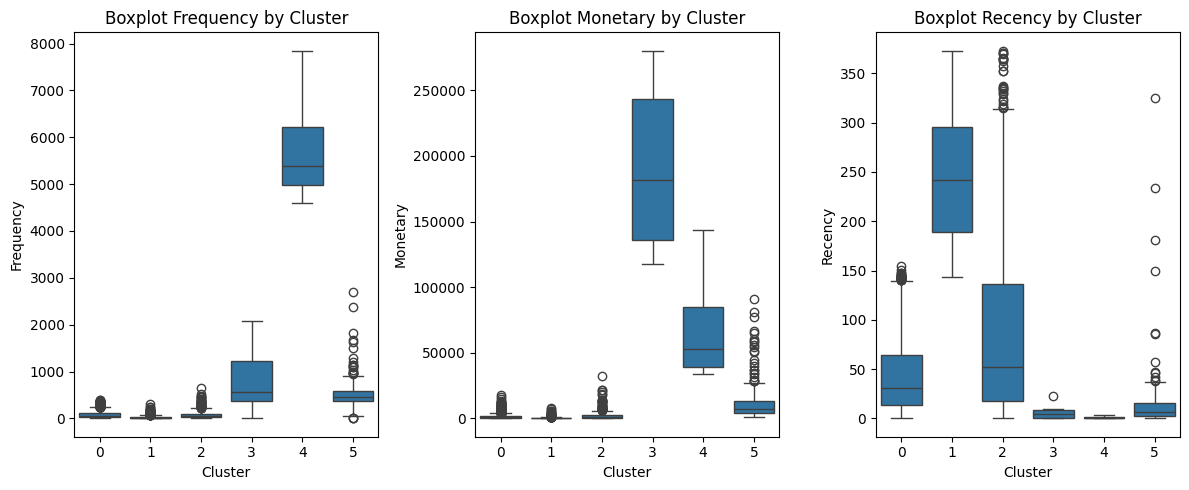

In [87]:
columns = ['Frequency', 'Monetary', 'Recency']

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, column in enumerate(columns):
    sns.boxplot(x='cluster', y=column, data=df_result_kmeans, ax=axes[i])
    axes[i].set_title(f'Boxplot {column} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

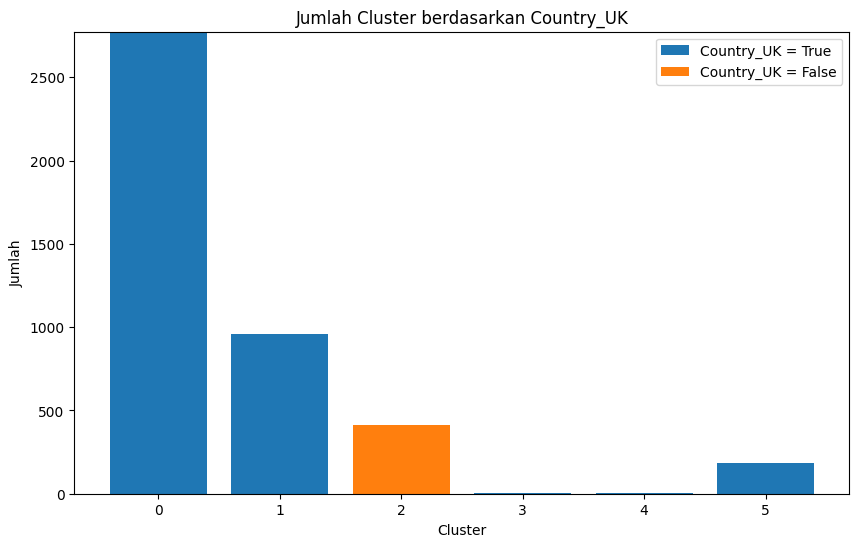

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah cluster untuk setiap nilai 'Country_UK'
cluster_counts_uk = df_result_kmeans.groupby(['cluster', 'Country_UK']).size().unstack(fill_value=0)

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.title('Jumlah Cluster berdasarkan Country_UK')
sns.set_palette('Set3')  # Pilihan warna untuk bar plot

# Plot untuk nilai 'True' (Country_UK == True)
plt.bar(cluster_counts_uk.index, cluster_counts_uk[True], label='Country_UK = True')

# Plot untuk nilai 'False' (Country_UK == False)
plt.bar(cluster_counts_uk.index, cluster_counts_uk[False], bottom=cluster_counts_uk[True], label='Country_UK = False')

plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.legend()
plt.show()

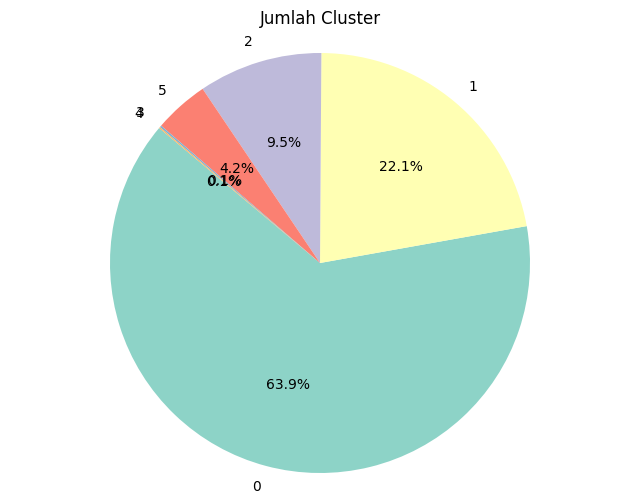

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah cluster
cluster_counts = df_result_kmeans['cluster'].value_counts()

# Membuat pie plot
plt.figure(figsize=(8, 6))
plt.title('Jumlah Cluster')
sns.set_palette('Set3')  # Pilihan warna untuk pie plot
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar pie plot menjadi lingkaran
plt.show()

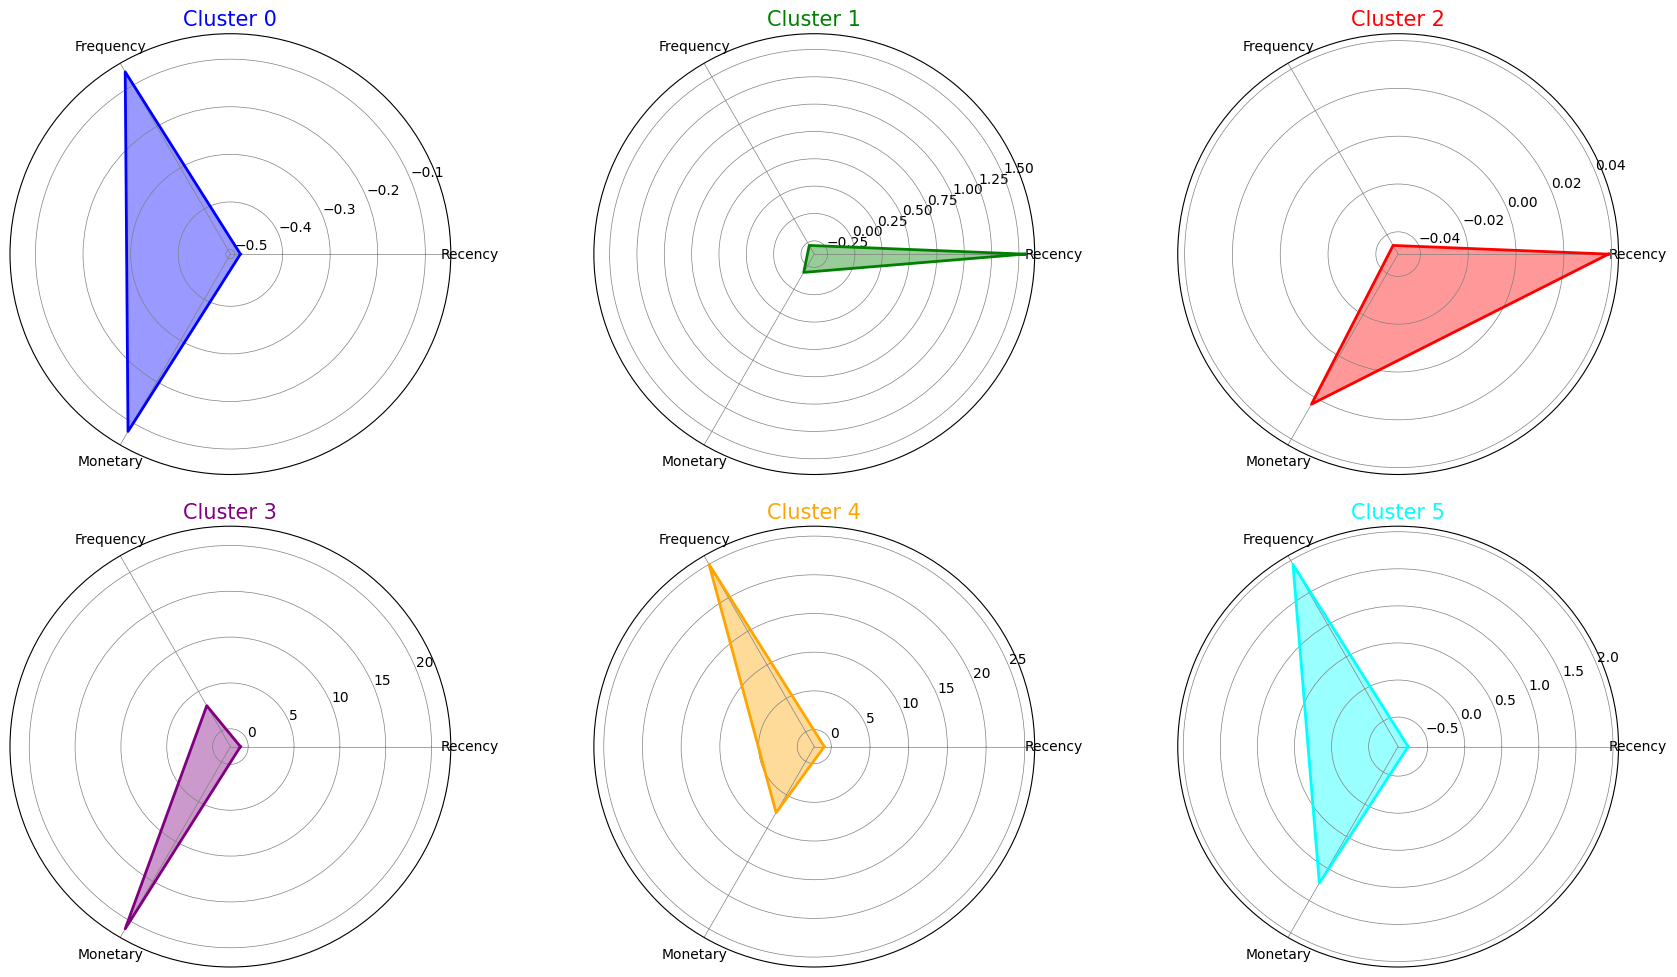

In [90]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = df_result_kmeans.copy()

# Assuming df_customer contains your customer data with 'CustomerID' set as the index
# Exclude non-numeric columns before standardization
numeric_cols = df_customer.select_dtypes(include=np.number).columns.tolist()
df_customer = df_customer[numeric_cols]

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(20, 10), subplot_kw=dict(polar=True))

# Colors for each cluster
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=15, color=color, y=1)

# Create radar chart for each cluster
for i, ax in enumerate(axs.flat):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax, angles, data, colors[i], i)

    # Add input data
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1])

    # Add a grid
    ax.grid(color='grey', linewidth=0.5)

# Adjust layout
plt.subplots_adjust(hspace=2.5)  # Set the vertical space between subplots
plt.tight_layout()
plt.show()

Berikut adalah karakteristik dari masing-masing cluster dan bentuk rekomendasi promo yang dapat dilakukan:

1. **Cluster 0:** Sebanyak 63.9% dari total pelanggan, atau sekitar 2773 orang, tergabung dalam Cluster 0. Mereka semuanya berasal dari United Kingdom dan cenderung jarang aktif berbelanja.
  
  **Karakteristik Utama:**
  * Frekuensi pembelian rendah: Pelanggan dalam cluster ini jarang melakukan pembelian.
  * Nilai transaksi kecil: Pelanggan ini rata-rata memiliki nilai transaksi yang kecil.
  * Lama tidak berbelanja: Sudah lama sejak pelanggan ini terakhir kali melakukan pembelian (sekitar 1,5 bulan).
  
  **Rekomendasi promo:**
  * Promo Diskon: Tawarkan diskon untuk menarik minat pelanggan untuk kembali berbelanja. Diskon dapat berupa persentase potongan harga atau harga tetap untuk produk tertentu.
  * Promo "comeback": Tawarkan promo khusus untuk pelanggan yang sudah lama tidak melakukan pembelian, seperti bonus poin atau cashback.

2. **Cluster 1:** Sebanyak 22.1% dari total pelanggan, atau sekitar 958 orang, tergabung dalam Cluster 1. Mereka semuanya berasal dari United Kingdom dan cenderung tidak aktif berbelanja.

  **Karakteristik Utama:**
  * Frekuensi pembelian sangat rendah: Pelanggan dalam cluster ini hampir tidak pernah melakukan pembelian.
  * Nilai transaksi sangat kecil: Pelanggan ini rata-rata memiliki nilai transaksi yang sangat rendah.
  * Lama tidak berbelanja: Sudah sangat lama sejak pelanggan ini terakhir kali melakukan pembelian (lebih dari 8 bulan).

  **Rekomendasi promo:**
  * Promo Reaktivasi: Tawarkan promo khusus untuk menarik minat pelanggan yang sudah tidak aktif selama 8 bulan. Ini bisa berupa diskon menarik, voucher belanja, atau gratis ongkir.
  * Promo Produk Diskon Besar: Tawarkan diskon besar-besaran untuk produk tertentu yang mungkin menarik minat mereka.

3. **Cluster 2:** Sebanyak 9.5% dari total pelanggan, atau sekitar 414 orang, tergabung dalam Cluster 2. Mereka semuanya berasal dari luar United Kingdom dan cenderung jarang aktif berbelanja.

  **Karakteristik Utama:**
  * Frekuensi pembelian cukup rendah: Pelanggan dalam cluster ini cukup jarang melakukan pembelian.
  * Nilai transaksi cukup kecil: Pelanggan ini rata-rata memiliki nilai transaksi yang cukup kecil.
  * Lama tidak berbelanja: Sudah cukup lama sejak pelanggan ini terakhir kali melakukan pembelian (sekitar 3 bulan).

  **Rekomendasi promo:**
  * Promo Gratis Ongkir: Biaya ongkir yang tinggi dapat menjadi penghalang bagi pelanggan di luar UK untuk berbelanja. Tawarkan promo gratis ongkir untuk menarik minat mereka.
  * Promo Penawaran Terbatas: Tawarkan promo dengan waktu terbatas untuk menciptakan rasa urgensi dan mendorong mereka untuk segera berbelanja.

4. **Cluster 3:** Sebanyak 0.2% dari total pelanggan, atau sekitar 6 orang, tergabung dalam Cluster 3. Mereka ada yang berasal dari dalam dan luar United Kingdom dan cenderung cukup aktif berbelanja.

  **Karakteristik Utama:**
  * Frekuensi pembelian tinggi: Pelanggan dalam cluster ini cukup sering melakukan pembelian.
  * Nilai transaksi sangat besar: Pelanggan ini rata-rata memiliki nilai transaksi yang sangat besar.
  * Lama tidak berbelanja: Pelanggan ini baru-baru saja melakukan pembelian (sekitar 6 hari terakhir).

  **Rekomendasi promo:**
  * Promo Eksklusif: Tawarkan promo eksklusif khusus untuk pelanggan. Promo ini bisa berupa diskon besar, voucher belanja, atau akses early bird ke produk baru.
  * Promo Program Loyalitas: Buat program loyalitas yang memberikan reward dan benefit menarik kepada pelanggan, seperti poin reward yang dapat ditukarkan dengan hadiah, akses ke event khusus, atau layanan pelanggan prioritas.

5. **Cluster 4:** Sebanyak 0.1% dari total pelanggan, atau sekitar 4 orang, tergabung dalam Cluster 4. Mereka ada yang berasal dari dalam dan luar United Kingdom dan cenderung aktif berbelanja.

  **Karakteristik Utama**:
  * Frekuensi pembelian sangat tinggi: Pelanggan dalam cluster ini  sangat sering melakukan pembelian.
  * Nilai transaksi besar: Pelanggan ini rata-rata memiliki nilai transaksi yang besar.
  * Lama tidak berbelanja: Pelanggan ini baru-baru saja melakukan pembelian (sekitar 1 hari terakhir).

  **Rekomendasi promo**:
  * Promo Layanan Premium: Tawarkan layanan premium kepada pelanggan, seperti pengiriman gratis, pengembalian barang yang mudah, dan customer service khusus.
  * Promo Promosi Produk Baru: Tawarkan promo untuk produk baru yang mungkin menarik bagi mereka. Berikan informasi detail tentang produk baru tersebut dan jelaskan bagaimana produk tersebut dapat bermanfaat bagi mereka.

6. **Cluster 5:** Sebanyak 4.2% dari total pelanggan, atau sekitar 183 orang, tergabung dalam Cluster 5. Mereka semua berasal dari United Kingdom dan cenderung cukup aktif berbelanja.

  **Karakteristik Utama**:
  * Frekuensi pembelian cukup tinggi: Pelanggan dalam cluster ini  cukup sering melakukan pembelian.
  * Nilai transaksi cukup besar: Pelanggan ini rata-rata memiliki nilai transaksi yang cukup besar.
  * Lama tidak berbelanja: Pelanggan ini baru-baru saja melakukan pembelian (sekitar 2 minggu terakhir).

  **Rekomendasi promo**:
  * Promo Penawaran Terbatas: Tawarkan promo dengan waktu terbatas untuk menciptakan rasa urgensi dan mendorong mereka untuk segera berbelanja.
  * Promo Hadiah Gratis: Tawarkan hadiah gratis untuk setiap pembelian untuk memberi insentif kepada mereka untuk melakukan transaksi. Pilih hadiah yang melengkapi produk yang mungkin mereka minati.


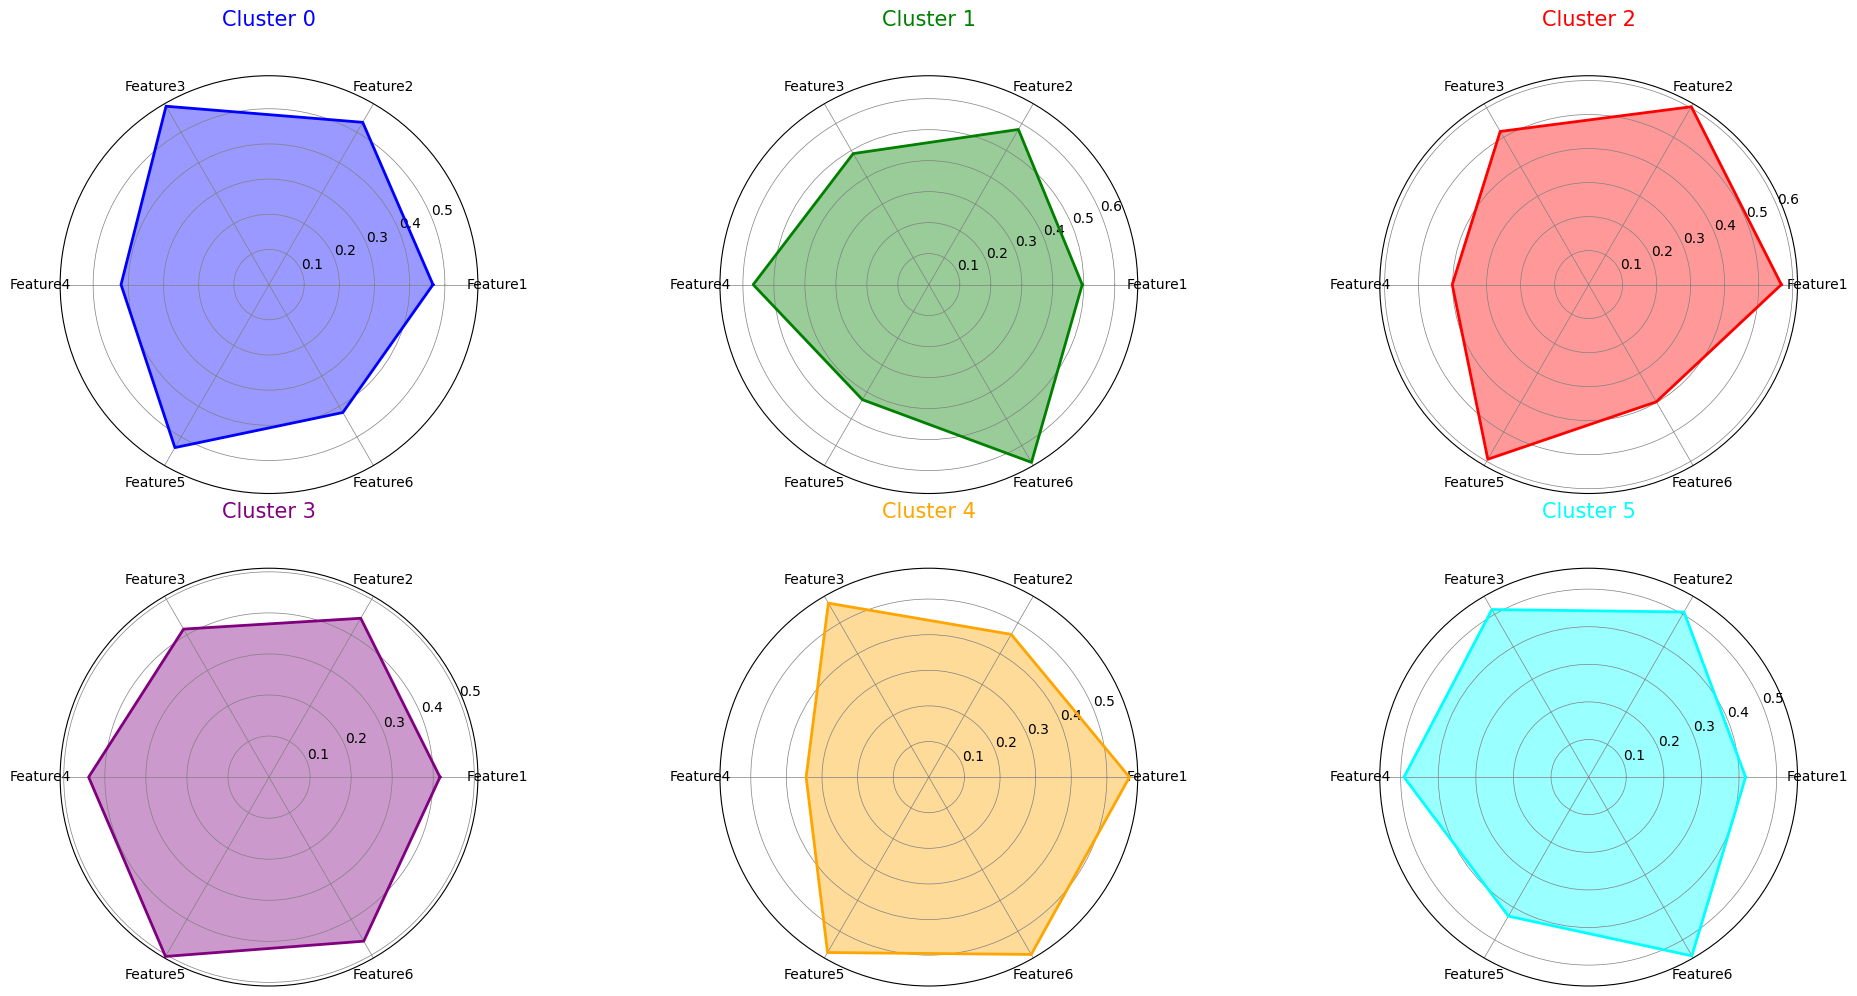

In [91]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Dummy data for demonstration
np.random.seed(0)
data = np.random.rand(100, 6)
df_customer = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6'])
df_customer['cluster'] = np.random.randint(0, 6, 100)

# Calculate the centroids of each cluster
cluster_centroids = df_customer.groupby('cluster').mean()

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(20, 10), subplot_kw=dict(polar=True))

# Colors for each cluster
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=15, color=color, y=1.1)

# Create radar chart for each cluster
for i, ax in enumerate(axs.flat):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax, angles, data, colors[i], i)

    # Add input data
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1])

    # Add a grid
    ax.grid(color='grey', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


##3.Non-UK Segmentation

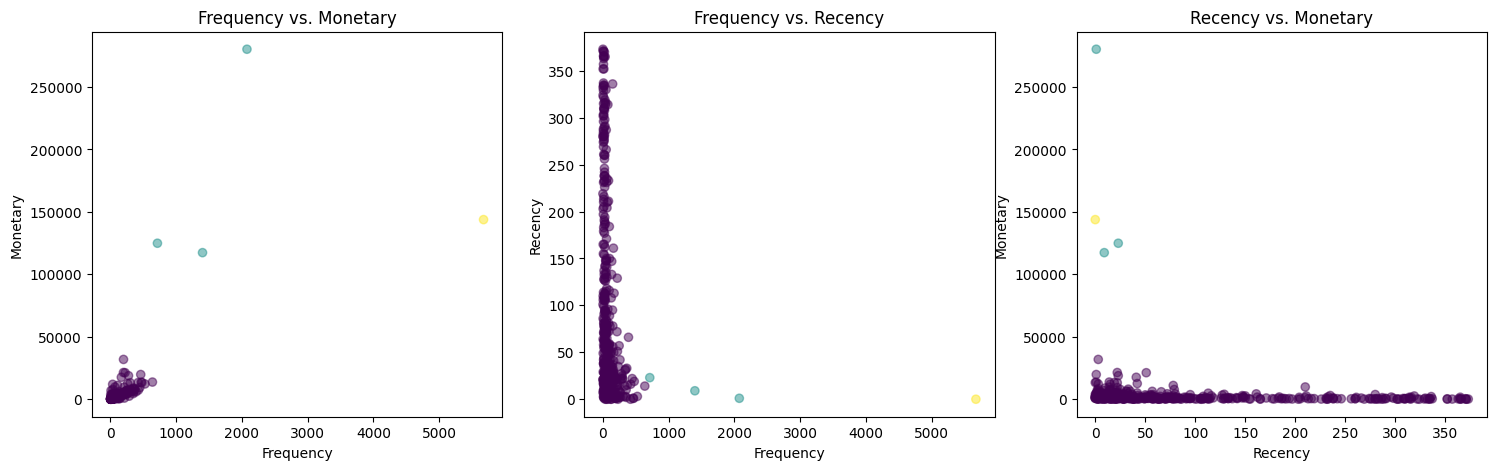

In [92]:
import matplotlib.pyplot as plt

# Filter data dengan Country_UK=False
df_filtered = df_result_kmeans[df_result_kmeans['Country_UK'] == False]

columns = ['Frequency', 'Monetary', 'Recency']
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

for i, ax in enumerate(axes.flatten()):
    if i < 2:
        j = 0
        k = i + 1
    else:
        j = i
        k = i - 1

    ax.scatter(df_filtered[columns[j]], df_filtered[columns[k]], c=df_filtered['cluster'], cmap='viridis', alpha=0.5)
    ax.set_xlabel(columns[j])
    ax.set_ylabel(columns[k])
    ax.set_title(columns[j] + ' vs. ' + columns[k])

plt.show()

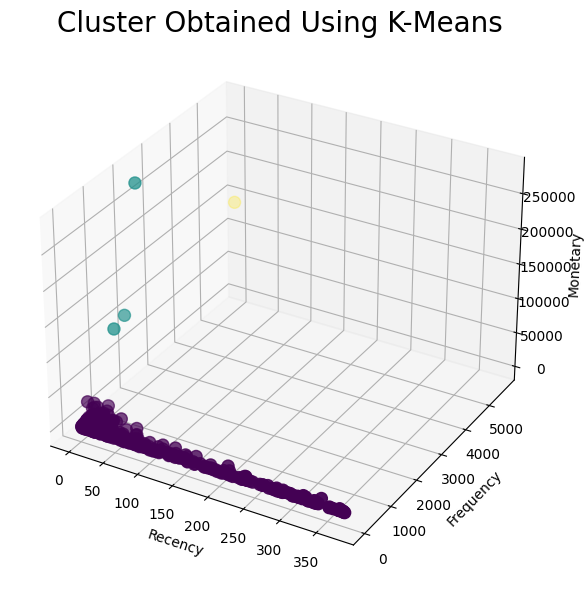

In [93]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_filtered['Recency'],df_filtered['Frequency'],df_filtered['Monetary'],
           c=df_filtered['cluster'], cmap = "viridis", s=75)
plt.title('Cluster Obtained Using K-Means', fontsize=20)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

In [94]:
# Hitung statistik deskriptif untuk setiap cluster
cluster_filtered_stats = df_filtered.groupby('cluster').agg({
    'Frequency': ['count', 'mean', 'median', 'sum'],
    'Monetary': ['count', 'mean', 'median', 'sum'],
    'Recency': ['count', 'mean', 'median', 'sum']
}).reset_index()

# Transpose DataFrame dan tampilkan dengan dua desimal
cluster_filtered_stats_transposed = cluster_filtered_stats.T.round(2)
cluster_filtered_stats_transposed

0          1          2
cluster                2.00       3.00       4.00
Frequency count      414.00       3.00       1.00
          mean        81.40    1396.67    5675.00
          median      45.00    1400.00    5675.00
          sum      33698.00    4190.00    5675.00
Monetary  count      414.00       3.00       1.00
          mean      2262.54  174166.73  143825.06
          median    1025.70  124914.53  143825.06
          sum     936691.11  522500.18  143825.06
Recency   count      414.00       3.00       1.00
          mean        95.41      11.00       0.00
          median      52.00       9.00       0.00
          sum      39498.00      33.00       0.00

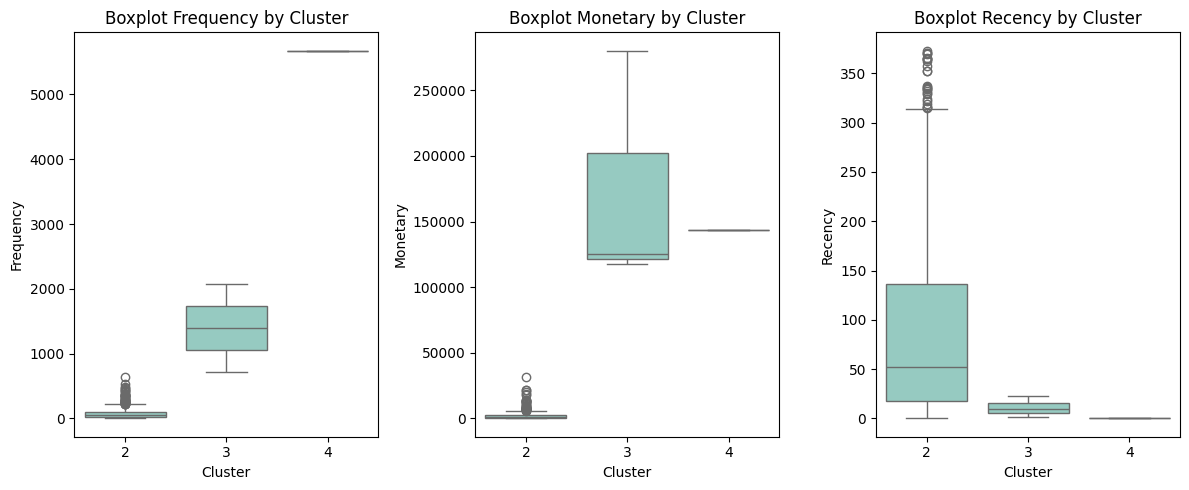

In [95]:
columns = ['Frequency', 'Monetary', 'Recency']

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, column in enumerate(columns):
    sns.boxplot(x='cluster', y=column, data=df_filtered, ax=axes[i])
    axes[i].set_title(f'Boxplot {column} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

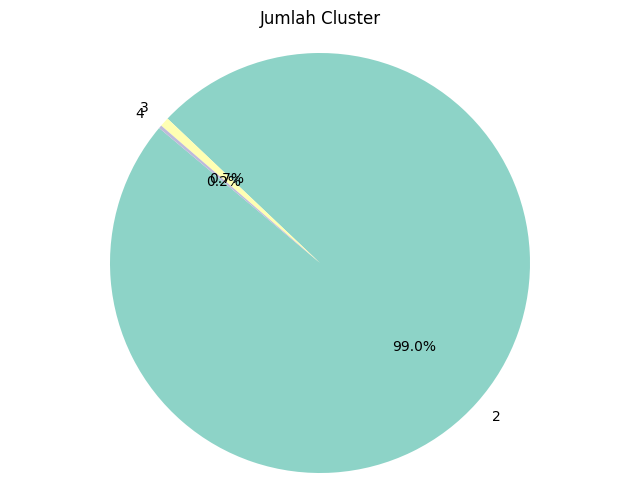

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah cluster
cluster_counts = df_filtered['cluster'].value_counts()

# Membuat pie plot
plt.figure(figsize=(8, 6))
plt.title('Jumlah Cluster')
sns.set_palette('Set3')  # Pilihan warna untuk pie plot
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Agar pie plot menjadi lingkaran
plt.show()

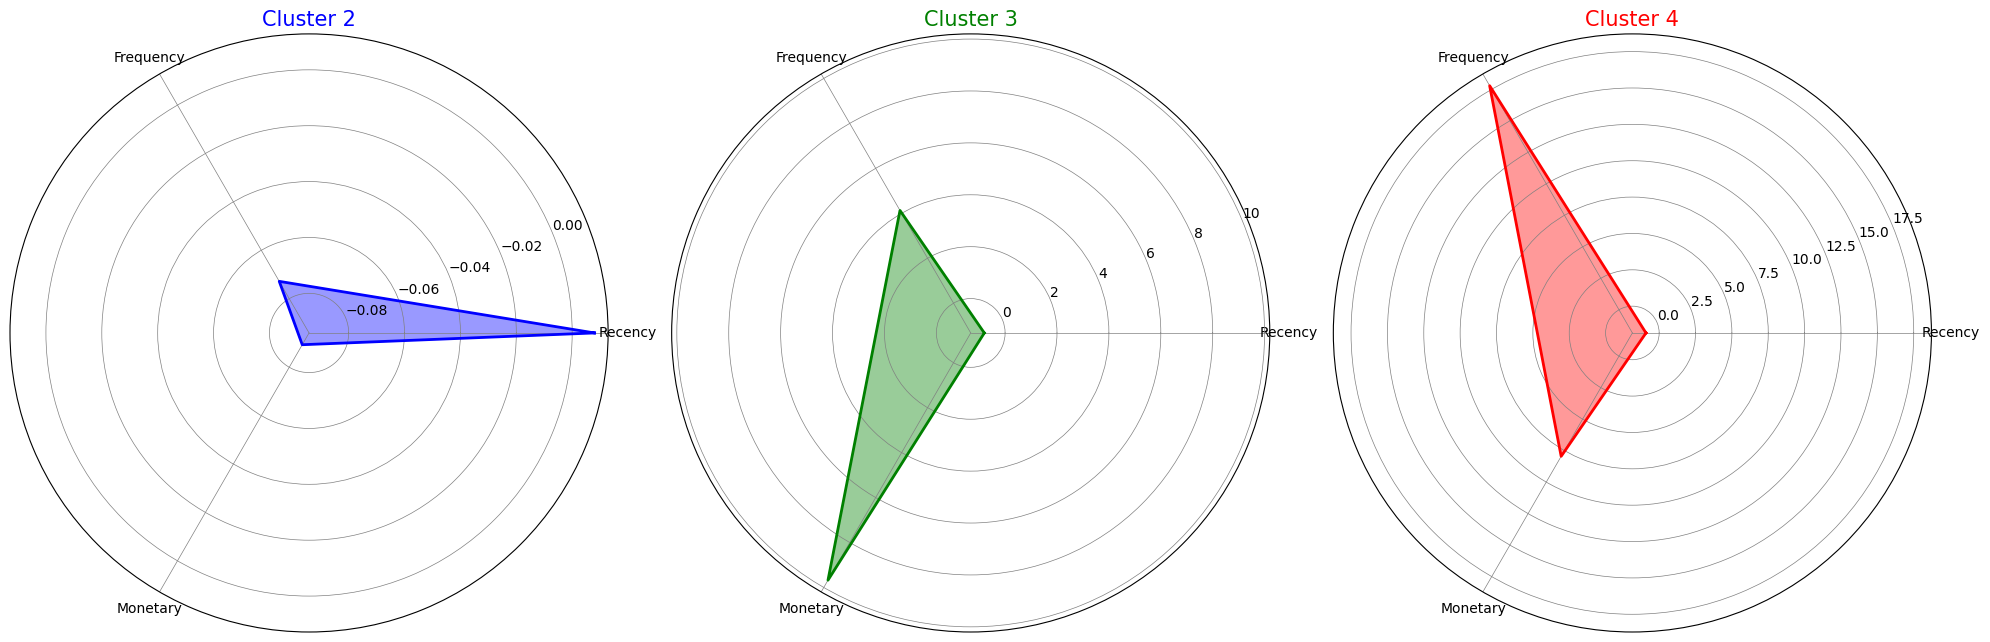

In [97]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer_non_uk = df_filtered.copy()

# Assuming df_customer_non_uk contains your customer data with 'CustomerID' set as the index
# Exclude non-numeric columns before standardization
numeric_cols = df_customer_non_uk.select_dtypes(include=np.number).columns.tolist()
df_customer_non_uk = df_customer_non_uk[numeric_cols]

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_non_uk_standardized = scaler.fit_transform(df_customer_non_uk.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_non_uk_standardized = pd.DataFrame(df_customer_non_uk_standardized, columns=df_customer_non_uk.columns[:-1], index=df_customer_non_uk.index)
df_customer_non_uk_standardized['cluster'] = df_customer_non_uk['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_non_uk_standardized.groupby('cluster').mean()

# Filter cluster 2, 3, dan 4 dari cluster_centroids
selected_clusters = [2, 3, 4]
cluster_centroids_selected = cluster_centroids.loc[selected_clusters]

# Set data
labels = np.array(cluster_centroids_selected.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(20, 10), subplot_kw=dict(polar=True))

# Colors for each cluster
colors = ['blue', 'green', 'red']

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=15, color=color, y=1)

# Create radar chart for each cluster
for i, ax in enumerate(axs.flat):
    cluster_number = selected_clusters[i]
    data = cluster_centroids_selected.loc[cluster_number].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax, angles, data, colors[i], cluster_number)

    # Add input data
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1])

    # Add a grid
    ax.grid(color='grey', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


Berdasarkan viualisasi diatas, terdapat 3 cluster pelanggan di luar UK dengan karakteristik utama sebagai berikut:
1. **Cluster 2:**

  **Karakteristik Utama:**
  * Jumlah pelanggan: 414 (99% dari total pelanggan di luar UK)
  * Frekuensi pembelian: Paling sedikit
  * Nilai transaksi: Terkecil
  * Lama belanja terakhir: 3 bulan lalu

  **Analisis:**
  * Cluster ini terdiri dari mayoritas pelanggan di luar UK, dengan frekuensi pembelian dan nilai transaksi yang rendah.
  * Mereka terakhir kali berbelanja 3 bulan lalu, menunjukkan tingkat retensi yang rendah.
  * Cluster ini mewakili pelanggan yang hanya membeli sekali atau dua kali dan tidak sering kembali.

2. **Cluster 3:**

  **Karakteristik Utama:**
  * Jumlah pelanggan: 3 (0.8% dari total pelanggan di luar UK)
  * Frekuensi pembelian: Cukup banyak
  * Nilai transaksi: Tertinggi
  * Lama belanja terakhir: 11 hari lalu
  
  **Analisis:**
  * Cluster ini terdiri dari pelanggan yang sedikit jumlahnya, dengan frekuensi pembelian yang cukup tinggi dan nilai transaksi tertinggi.
  * Mereka terakhir kali berbelanja 11 hari lalu, menunjukkan tingkat retensi yang baik.
  * Cluster ini mewakili pelanggan setia dengan nilai transaksi yang tinggi.

3. **Cluster 4:**

  **Karakteristik Utama:**
  * Jumlah pelanggan: 1 (0.2% dari total pelanggan di luar UK)
  * Frekuensi pembelian: Paling banyak
  * Nilai transaksi: Cukup kecil
  * Baru saja berbelanja

  **Analisis:**
  * Cluster ini terdiri dari satu pelanggan, dengan frekuensi pembelian paling banyak, namun nilai transaksinya cukup kecil.
  * Pelanggan ini baru saja berbelanja, menunjukkan perilaku impulsif atau sering berbelanja.
  * Cluster ini mewakili pelanggan baru atau pelanggan yang belum memiliki pola pembelian yang jelas.


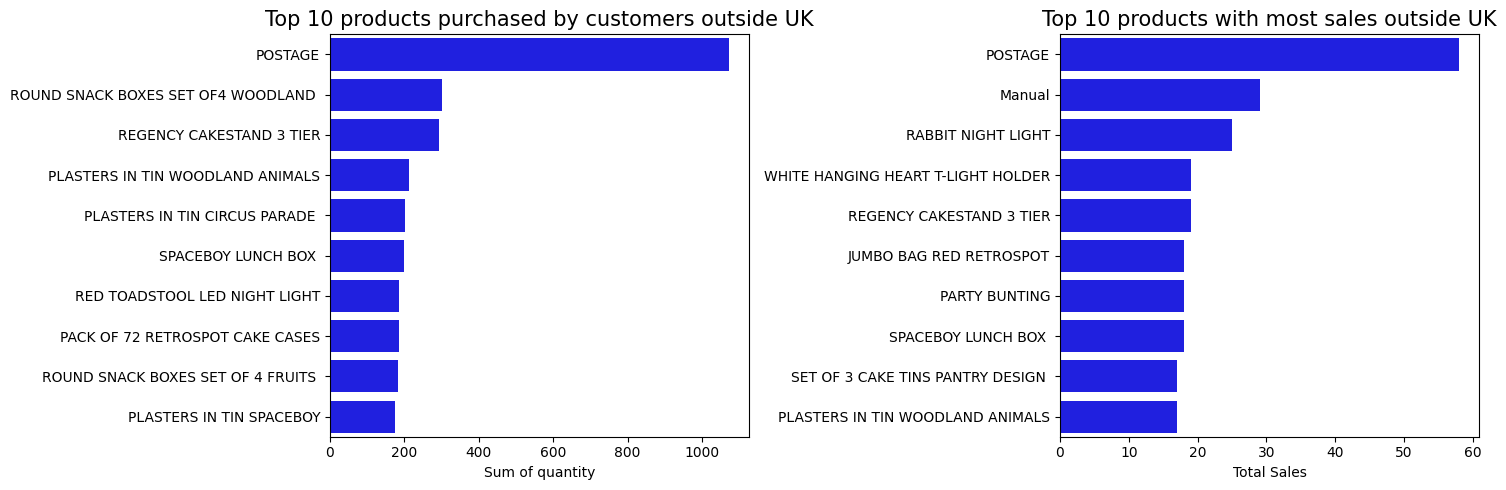

In [98]:
column = ['InvoiceNo','TotalAmount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df_eda[df_eda['Country']=='Others'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = df_eda[df_eda['Country']=='Others'].groupby('Description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='blue')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers outside UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales outside UK',size=15)

plt.tight_layout()
plt.show()

Berikut analisis dari visualisasi data untuk customer yang berada di luar UK:
1. Grafik pembelian produk terbanyak
  * Produk dengan jumlah kuantitas pembelian terbanyak adalah `POSTAGE`.
  * Grafik ini memberikan wawasan tentang preferensi pelanggan dalam hal jumlah produk yang dibeli.
2. Grafik penjualan tertinggi
  * Produk dengan total penjualan tertinggi adalah `POSTAGE`.
  * Grafik ini menggambarkan produk-produk yang paling menguntungkan dari segi total penjualan.

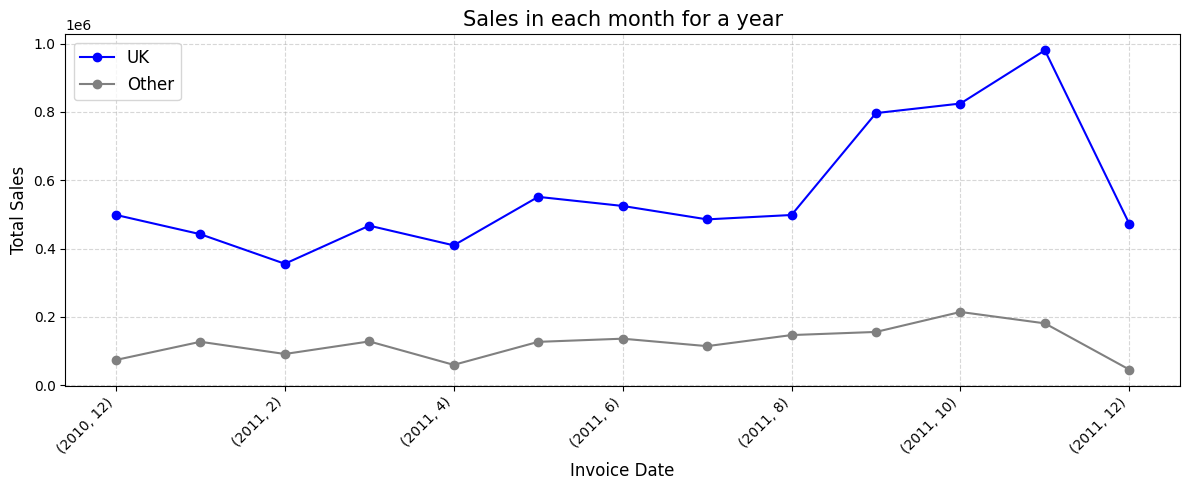

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Filter data by country and calculate total sales by month
uk_sales = df_eda[df_eda['Country'] == 'United Kingdom'].groupby(['year', 'month'])['TotalAmount'].sum()
other_sales = df_eda[df_eda['Country'] != 'United Kingdom'].groupby(['year', 'month'])['TotalAmount'].sum()

# Plot UK sales
uk_sales.plot(kind='line', label='UK', color='blue', marker='o')

# Plot Other sales
other_sales.plot(kind='line', label='Other', color='grey', marker='o')

plt.xlabel('Invoice Date', size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for a year', size=15)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas dapat disimpulkan bahwa:
* Tren Penjualan Menurun: Penjualan di luar UK menunjukkan tren penurunan dari tahun ke tahun dan mencapai titik terendah pada Desember 2011.
* Fluktuasi Stabil: Penjualan di luar UK lebih stabil atau stagnan dibandingkan dengan penjualan di UK.
* Performa Kurang Baik: Penjualan di luar UK perlu ditingkatkan untuk mencapai performa yang lebih baik.

Peningkatan penjualan dapat dilakukan dengan berbagai cara, seperti:
* Meningkatkan strategi pemasaran: Perlu dilakukan strategi pemasaran yang lebih efektif untuk meningkatkan kesadaran merek dan minat konsumen di luar UK.
* Memperluas jangkauan pasar: Perlu dilakukan upaya untuk memperluas jangkauan pasar ke negara-negara baru di luar UK.
* Meningkatkan kualitas produk: Perlu dilakukan upaya untuk meningkatkan kualitas produk agar lebih kompetitif di pasar global.

In [100]:
# Membuat DataFrame baru df_cluster yang berisi CustomerID dengan cluster
df_cluster = df_result_kmeans[['Frequency','Monetary','Recency','cluster']].reset_index()

# Merge df_cluster dengan df_eda berdasarkan CustomerID
df_merged = df_eda.merge(df_cluster, on='CustomerID')

# Mendapatkan nilai hitung (value count) dari kolom 'cluster'
cluster_value_counts = df_merged['cluster'].value_counts()
print(cluster_value_counts)

df_merged.head()

cluster
0    211499
5     97971
2     33698
1     26527
4     23228
3      4961
Name: count, dtype: int64


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Country_isUK  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom           UK   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom           UK   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom           UK   

   TotalAmount  year  month  week  date        day  hour  Frequency  Monetary  \
0        15.30  2010     12    48     1  Wednesday     8        297   5391.21   
1        20.34  2010     12    48     1  Wednesday     8        297   5391.21   
2        22.00  2010     12    48     1  Wednesday     8        297   5391.21   
3        20.34  2010     12    48     1  Wednesday     8        297   5391.21   
4        20.34  2010     12    48     1  Wednesday     8        297   5391.21   

   Recency  cluster  
0      371        1  
1      371        1  
2      371        1  
3      371        1  
4      371        1

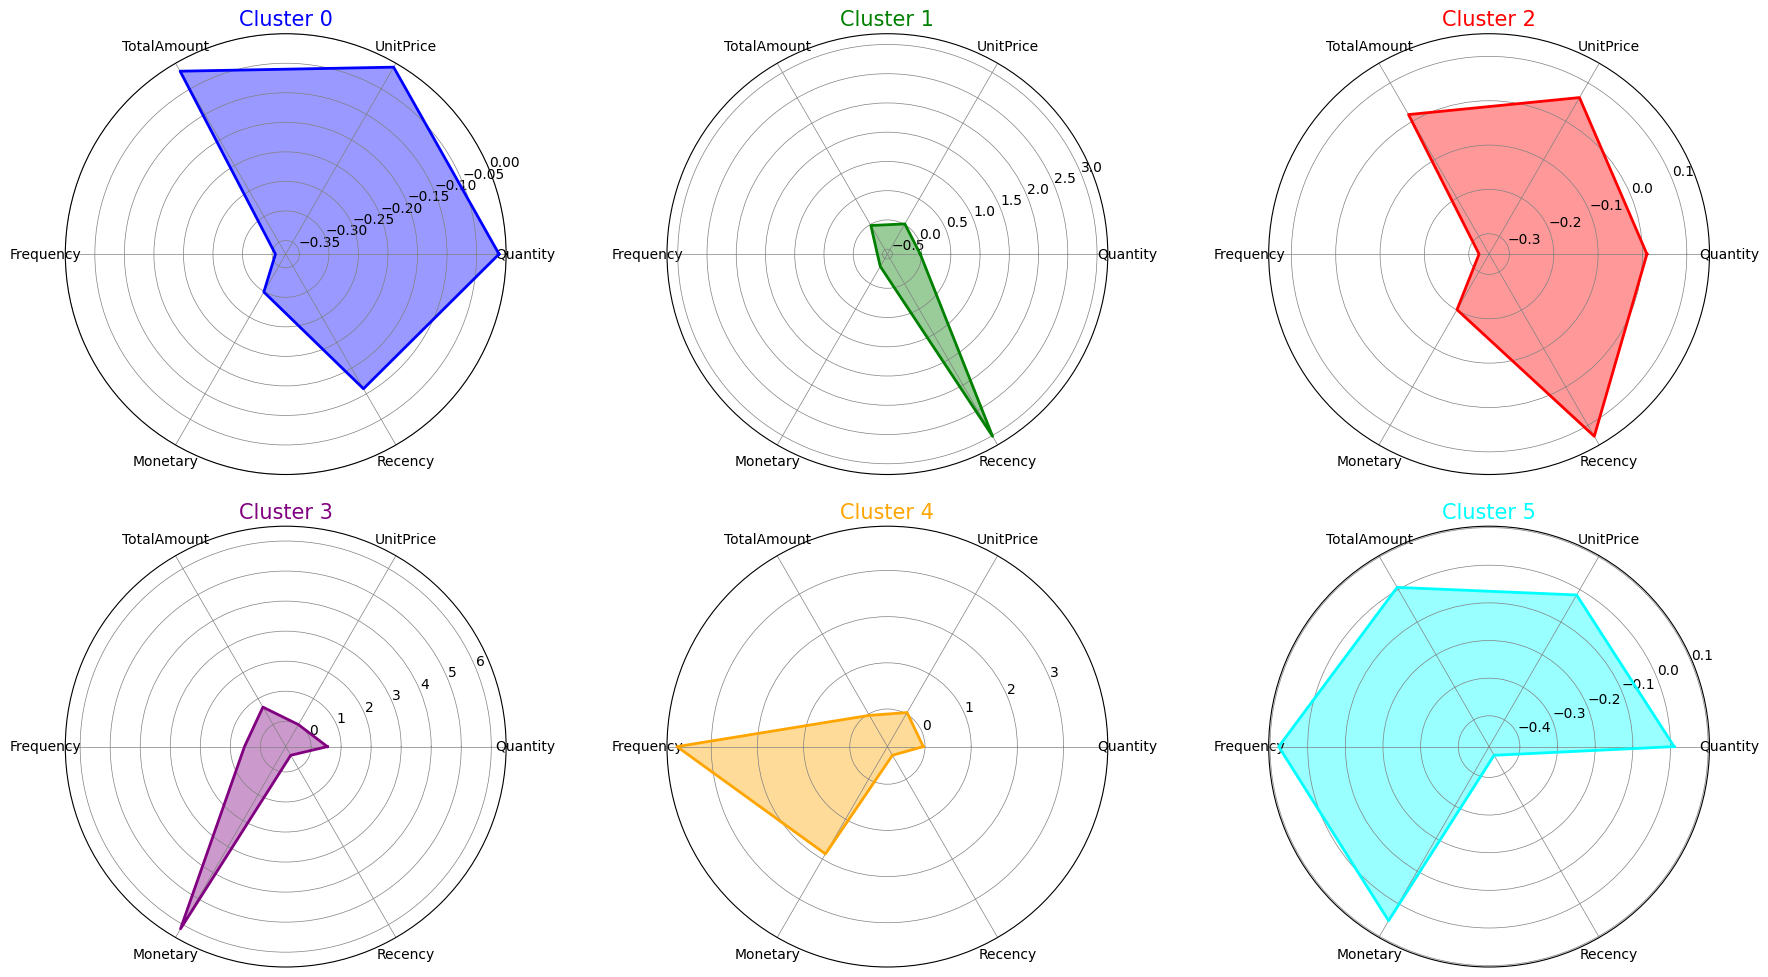

In [101]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = df_merged.copy()
df_customer = df_customer.set_index('CustomerID')

# Drop kolom yang tidak diinginkan
columns_to_drop = ['year', 'date', 'month', 'hour', 'day','week']
df_customer = df_customer.drop(columns=columns_to_drop)

# Assuming df_customer contains your customer data with 'CustomerID' set as the index
# Exclude non-numeric columns before standardization
numeric_cols = df_customer.select_dtypes(include=np.number).columns.tolist()
df_customer = df_customer[numeric_cols]

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(20, 10), subplot_kw=dict(polar=True))

# Colors for each cluster
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=15, color=color, y=1)

# Create radar chart for each cluster
for i, ax in enumerate(axs.flat):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax, angles, data, colors[i], i)

    # Add input data
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1])

    # Add a grid
    ax.grid(color='grey', linewidth=0.5)

# Adjust layout
plt.subplots_adjust(hspace=2.5)  # Set the vertical space between subplots
plt.tight_layout()
plt.show()